In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import math
from scipy import optimize
import scipy.stats as stats
from scipy.stats import norm


# 1 Data Preprocessing

In [48]:
df = pd.read_excel('closing_price.xlsx')
time = df['Bloomberg Ticker']
data = df['AAPL UW Equity']
# time,data

In [105]:
apple_price = data.values
apple_price

array([5.2170e+03, 3.9980e+00, 3.6610e+00, ..., 2.8980e+02, 2.9152e+02,
       2.9365e+02])

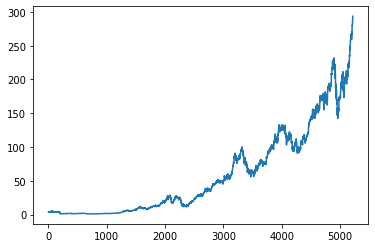

In [106]:
plt.plot(apple_price[1:len(apple_price)])
plt.show()

In [58]:
length=len(apple_price)
length

5218

In [4]:
x = [(apple_price[i]-apple_price[i-1])/apple_price[i-1] for i in range(1, apple_price.shape[0])]
# x

In [61]:
learning_set_x = x[:len(x)*3//4]
testing_set_x  = x[len(x)*3//4:]
len_learning=len(learning_set_x)
len_testing=len(testing_set_x)
len_learning,len_testing

(3912, 1305)

In [6]:
epsilon = np.mean(learning_set_x)
# epsilon

In [7]:
d = ['D' if i < -epsilon else 'U' if i > epsilon else 'H' for i in x]
# d

In [8]:
learning_set = apple_price[:len(apple_price)*3//4]
testing_set  = apple_price[len(apple_price)*3//4:]
# len(learning_set),len(testing_set)

# 2 Cumulative Distribution Function

In [9]:
Ux = sorted([learning_set_x[i] for i in range(len(learning_set_x)-1) if d[i+1] == 'U'])
Dx = sorted([learning_set_x[i] for i in range(len(learning_set_x)-1) if d[i+1] == 'D'])

In [10]:
FU = sorted(Ux)
val, cnt = np.unique(Ux, return_counts=True)
pmf = cnt/len(Ux)
FU_rv_discrete = stats.rv_discrete(name='fs_rv_dist', values=(val, pmf))

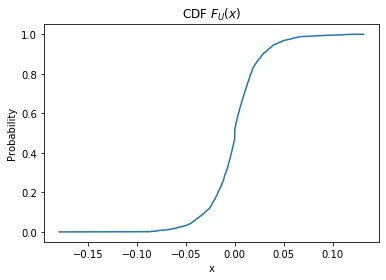

In [11]:
plt.plot(val, FU_rv_discrete.cdf(val), '-')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('CDF $F_U(x)$')
plt.show()

In [12]:
FD = sorted(Dx)
val, cnt = np.unique(Dx, return_counts=True)
pmf = cnt/len(Dx)
FD_rv_discrete = stats.rv_discrete(name='fs_rv_dist', values=(val, pmf))

Text(0.5, 1.0, 'CDF $F_D(x)$')

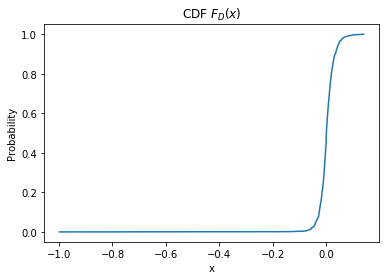

In [13]:
plt.plot(val, FD_rv_discrete.cdf(val), '-')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('CDF $F_D(x)$')

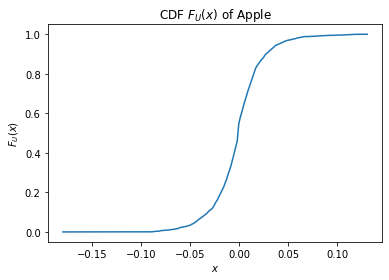

In [14]:
count,low,binsize,_=stats.cumfreq(Ux, numbins=200)
cdf_U_x=[]
cdf_U_x.append(low)
for i in range(1,200):
    cdf_U_x.append(cdf_U_x[i-1]+binsize)
cdf_U=[]
for i in range(200):
    cdf_U.append(count[i]/len(Ux))

# plt.figure(figsize=(12,8))
plt.plot(cdf_U_x,cdf_U)
plt.title('CDF $F_U(x)$ of Apple')
plt.ylabel('$F_U(x)$')
plt.xlabel('$x$')
plt.savefig("FU(x)")
plt.show()

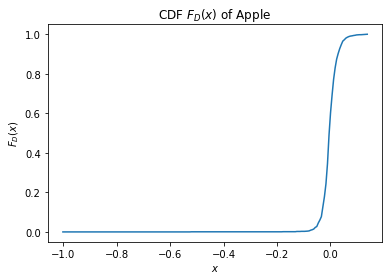

In [15]:
count,low,binsize,_=stats.cumfreq(Dx, numbins=200)
cdf_D_x=[]
cdf_D_x.append(low)
for i in range(1,200):
    cdf_D_x.append(cdf_D_x[i-1]+binsize)
cdf_D=[]
for i in range(200):
    cdf_D.append(count[i]/len(Dx))

# plt.figure(figsize=(12,8))
plt.plot(cdf_D_x,cdf_D)
plt.title('CDF $F_D(x)$ of Apple')
plt.ylabel('$F_D(x)$')
plt.xlabel('$x$')
plt.savefig("FD(x)")
plt.show()

# 3.Probability Density Function

In [16]:
def FD_distribution(x, b, x0):
    return 1/(1+np.exp(-b*(x-x0)))

In [17]:
b_U, x0_U = optimize.curve_fit(FD_distribution, cdf_U_x, cdf_U)[0]
b_D, x0_D = optimize.curve_fit(FD_distribution, cdf_D_x, cdf_D)[0]
# b_U, x0_U, b_D, x0_D

In [18]:
FU_FDFit = [FD_distribution(x, b_U, x0_U) for x in cdf_U_x]
FD_FDFit = [FD_distribution(x, b_D, x0_D) for x in cdf_D_x]

In [19]:
def fD_distribution(x, b, x0):
    return (b*np.exp(-b*(x-x0)))/(1+np.exp(-b*(x-x0)))**2

In [20]:
fU_FDFit = [fD_distribution(x, b_U, x0_U)/len(cdf_U_x) for x in cdf_U_x]
fD_FDFit = [fD_distribution(x, b_D, x0_D)/len(cdf_D_x) for x in cdf_D_x]

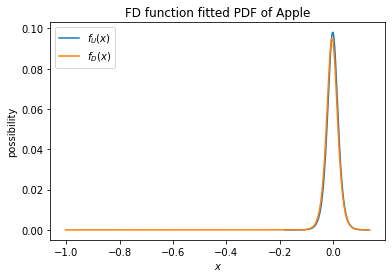

In [21]:
plt.plot(cdf_U_x, fU_FDFit, label="$f_U(x)$")
plt.plot(cdf_D_x, fD_FDFit, label="$f_D(x)$")
plt.title('FD function fitted PDF of Apple')
plt.ylabel('possibility')
plt.xlabel('$x$')
plt.legend()
plt.savefig("f(x) FD fitted")
plt.show()

NameError: name 'F_U' is not defined

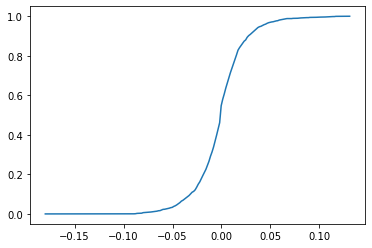

In [22]:
# plt.plot(cdf_U_x,cdf_U,label="$F_U(x)$")
# plt.plot(cdf_U_x,F_U,label="fitted curve")
# plt.title('fitted CDF $F_U(x)$ of Apple')
# plt.ylabel('possibility')
# plt.xlabel('$x$')
# plt.legend()
# plt.savefig("FU(x) FD fitted")
# plt.show()

NameError: name 'F_D' is not defined

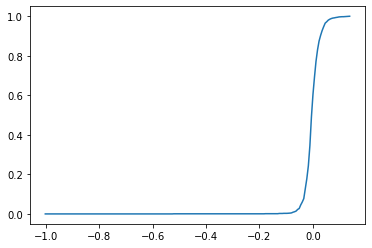

In [23]:
# plt.plot(cdf_D_x,cdf_D,label="$F_D(x)$")
# plt.plot(cdf_D_x,F_D,label="fitted curve")
# plt.title('fitted CDF $F_D(x)$ of Apple')
# plt.ylabel('possibility')
# plt.xlabel('$x$')
# plt.legend()
# plt.savefig("FD(x) FD fitted")
# plt.show()

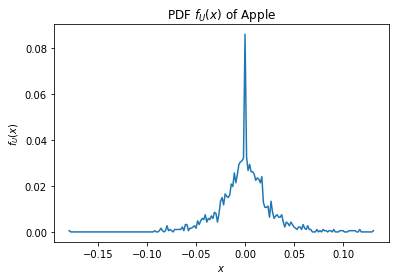

In [24]:
count,low,binsize,_=stats.relfreq(Ux, numbins=200)
pdf_U_x=[]
pdf_U_x.append(low)
for i in range(1,200):
    pdf_U_x.append(pdf_U_x[i-1]+binsize)
pdf_U=[]
for i in range(200):
    pdf_U.append(count[i])

# plt.figure(figsize=(12,8))
plt.plot(pdf_U_x,pdf_U)
plt.title('PDF $f_U(x)$ of Apple')
plt.ylabel('$f_U(x)$')
plt.xlabel('$x$')
plt.savefig("fU(x)")
plt.show()

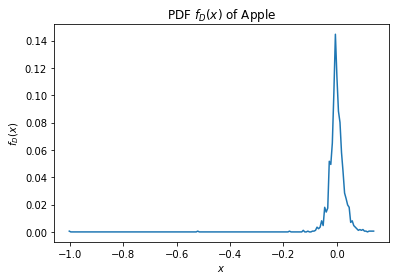

In [25]:
count,low,binsize,_=stats.relfreq(Dx, numbins=200)
pdf_D_x=[]
pdf_D_x.append(low)
for i in range(1,200):
    pdf_D_x.append(pdf_D_x[i-1]+binsize)
pdf_D=[]
for i in range(200):
    pdf_D.append(count[i])

plt.plot(pdf_D_x,pdf_D)
plt.title('PDF $f_D(x)$ of Apple')
plt.ylabel('$f_D(x)$')
plt.xlabel('$x$')
plt.savefig('fD(x)')
plt.show()

In [26]:
def Gaussian_distribution(x, mu, sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)

In [27]:
mean_U = np.mean(Ux)
std_U  = np.sqrt(sum((Ux-mean_U)**2)/len(Ux))

In [28]:
mean_D = np.mean(Dx)
std_D  = np.sqrt(sum((Dx-mean_D)**2)/len(Dx))

In [29]:
mean_U, std_U, mean_D, std_D

(0.00015791983425833504,
 0.026259899575427015,
 0.001900384849612306,
 0.037892759755862794)

In [30]:
gU_GaussianFit = [Gaussian_distribution(x, mean_U, std_U) for x in cdf_U_x]
gD_GaussianFit = [Gaussian_distribution(x, mean_D, std_D) for x in cdf_D_x]
#这里我直接除了g的长度，不清楚你的纵坐标是怎么算的 
#后面我又补了一张我的方法gu和gd在一起的图
# for i in pdf_U_x:
#     f_U.append(Gaussian_distribution(i,0.01, 0.01901651014487778))
# f_D=[]
# for i in pdf_D_x:
#     f_D.append(Gaussian_distribution(i,0.01, 0.0377667340197279))

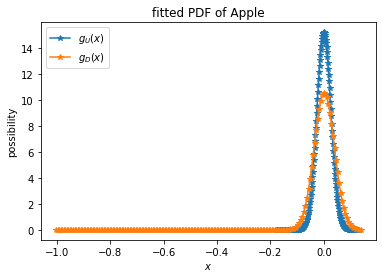

In [31]:
plt.plot(cdf_U_x, gU_GaussianFit,'-*', label="$g_U(x)$")
plt.plot(cdf_D_x, gD_GaussianFit,'-*', label="$g_D(x)$")
plt.title('fitted PDF of Apple')
plt.ylabel('possibility')
plt.xlabel('$x$')
plt.legend()
plt.savefig("f(x) gs fitted.png")
plt.show()

In [32]:
# plt.plot(pdf_U_x,f_U,'-*', label="$g_U(x)$")
# plt.plot(pdf_D_x,f_D,'-*', label="$g_D(x)$")
# plt.title('fitted PDF of Apple')
# plt.ylabel('possibility')
# plt.xlabel('$x$')
# plt.legend()
# plt.savefig("f(x) gs fitted.png")
# plt.show()

NameError: name 'f_U' is not defined

In [33]:
parameters = norm.fit(pdf_U)
f_U = norm.pdf(pdf_U_x, loc = parameters[0], scale = parameters[1])/len(pdf_U_x)
parameters = norm.fit(pdf_D)
f_D = norm.pdf(pdf_D_x, loc = parameters[0], scale = parameters[1])/len(pdf_D_x)

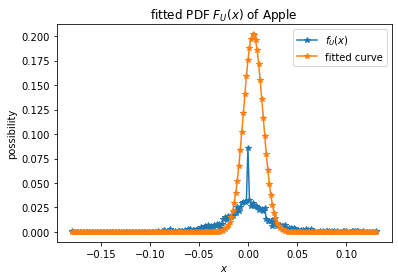

In [34]:
plt.plot(pdf_U_x,pdf_U,'-*',label="$f_U(x)$")
plt.plot(pdf_U_x,f_U,'-*',label="fitted curve")
plt.title('fitted PDF $F_U(x)$ of Apple')
plt.ylabel('possibility')
plt.xlabel('$x$')
plt.legend()
plt.savefig('fU(x) fitted.png')
plt.show()

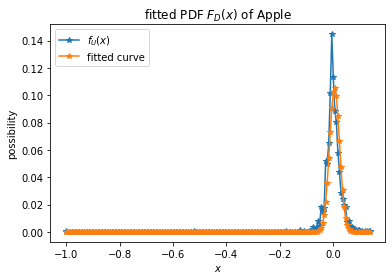

In [35]:
plt.plot(pdf_D_x,pdf_D,'-*',label="$f_U(x)$")
plt.plot(pdf_D_x,f_D,'-*',label="fitted curve")
plt.title('fitted PDF $F_D(x)$ of Apple')
plt.ylabel('possibility')
plt.xlabel('$x$')
plt.legend()
plt.savefig('fD(x) fitted.png')
plt.show()

# 4 Bayes Detector
$$
H_0=U,H_1=D
$$
区间内U，区间外D

In [36]:
PU = len(Ux)/len(learning_set_x)
PD = len(Dx)/len(learning_set_x)

In [37]:
cUU, cUD, cDU, cDD = 0, 1, 1, 0
mu = ((cDU-cUU)*PU)/((cUD-cDD)*PD)

In [38]:
def find_cut_point_FD(args):
    x = args[0]
    return [
        ((b_D*np.exp(-b_D*(x-x0_D)))/(1+np.exp(-b_D*(x-x0_D)))**2)/((b_U*np.exp(-b_U*(x-x0_U)))/(1+np.exp(-b_U*(x-x0_U)))**2) - mu
    ]

In [39]:
cut_point_FD = [optimize.fsolve(find_cut_point_FD, [0.1])[0], optimize.fsolve(find_cut_point_FD, [-0.1])[0]]

In [40]:
cut_point_FD

[0.13659818604423596, -0.017125770813066352]

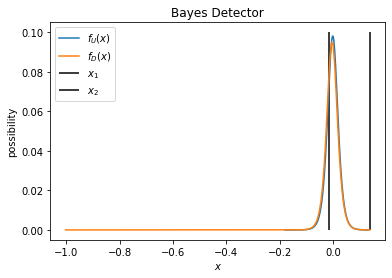

In [41]:
plt.plot(cdf_U_x, fU_FDFit, label="$f_U(x)$")
plt.plot(cdf_D_x, fD_FDFit, label="$f_D(x)$")
plt.vlines(cut_point_FD[0], 0, 0.1, label='$x_1$')
plt.vlines(cut_point_FD[1], 0, 0.1, label='$x_2$')
plt.title('Bayes Detector')
plt.ylabel('possibility')
plt.xlabel('$x$')
plt.legend()
plt.savefig("Bayes1")
plt.show()

In [42]:
def find_cut_point_Gaussian(args):
    x = args[0]
    return [
        (np.exp(-(x-mean_D)**2/(2*std_D**2))/np.sqrt(2*np.pi*std_D**2))/(np.exp(-(x-mean_U)**2/(2*std_U**2))/np.sqrt(2*np.pi*std_U**2)) - mu
    ]

In [43]:
cut_point_Gaussian = [optimize.fsolve(find_cut_point_Gaussian, [0.1])[0], optimize.fsolve(find_cut_point_Gaussian, [-0.1])[0]]

In [45]:
cut_point_Gaussian

[0.033171990447945145, -0.036076322357826304]

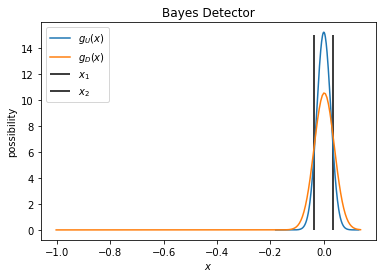

In [46]:
plt.plot(cdf_U_x, gU_GaussianFit, label="$g_U(x)$")
plt.plot(cdf_D_x, gD_GaussianFit, label="$g_D(x)$")
plt.vlines(cut_point_Gaussian[1], 0, 15, label='$x_1$')
plt.vlines(cut_point_Gaussian[0], 0, 15, label='$x_2$')
plt.title('Bayes Detector')
plt.ylabel('possibility')
plt.xlabel('$x$')
plt.legend()
plt.savefig("Bayes2")
plt.show()

# 5 Association Rules

In [52]:
d_learning = d[:len(d)*3//4]
d_testing  = d[len(d)*3//4:]

#### 1-Day
$$
R^1_U:d(t)\rightarrow d(t+1)=U \\\
R^1_D:d(t)\rightarrow d(t+1)=D
$$
所以我就用一个简单的转移矩阵来算了？

In [53]:
def alphabets(i):
    if i=='U':
        return 0
    if i=='D':
        return 1
    if i=='H':
        return 2
rule1=np.zeros((3,3))
for i in range(len(d_learning)-1):
    rule1[alphabets(d_learning[i])][alphabets(d_learning[i+1])]+=1
print(rule1)

[[860. 854. 156.]
 [841. 741. 139.]
 [169. 126.  25.]]


2 best 1-day rules $R^1_U$ and $R^1_U$ are $U\rightarrow U$ and $U\rightarrow D$

In [54]:
print("rule \t support \t confidence")
print("UU \t "+str((860+854+156)/np.sum(rule1)) +"\t "+str(860/(860+854+156)))
print("UD \t "+str((841+741+139)/np.sum(rule1)) +"\t "+str(854/(841+741+139)))


rule 	 support 	 confidence
UU 	 0.4781385834824853	 0.45989304812834225
UD 	 0.4400409102531322	 0.4962231260894829


#### 5-Day
$$
R^5_U:\{d(t-4),d(t-3),d(t-2),d(t-1),d(t)\}\rightarrow d(t+1)=U \\\
R^5_D:\{d(t-4),d(t-3),d(t-2),d(t-1),d(t)\}\rightarrow d(t+1)=D
$$

In [55]:
rule2=np.zeros((3,3,3,3,3))
count_U=np.zeros((3,3,3,3,3))
count_D=np.zeros((3,3,3,3,3))
for i in range(5,len(d_learning)):
    rule2[alphabets(d_learning[i-5])][alphabets(d_learning[i-4])][alphabets(d_learning[i-3])][alphabets(d_learning[i-2])][alphabets(d_learning[i-1])]+=1
    if d_learning[i]=='U':
        count_U[alphabets(d_learning[i-5])][alphabets(d_learning[i-4])][alphabets(d_learning[i-3])][alphabets(d_learning[i-2])][alphabets(d_learning[i-1])]+=1
    if d_learning[i]=='D':
        count_D[alphabets(d_learning[i-5])][alphabets(d_learning[i-4])][alphabets(d_learning[i-3])][alphabets(d_learning[i-2])][alphabets(d_learning[i-1])]+=1
U_best_value=-float('inf')
D_best_value=-float('inf')
U_best_rule=[0,0,0,0,0]
D_best_rule=[0,0,0,0,0]
for i in range(3):
    for j in range(3):
        for k in range(3):
            for l in range(3):
                for m in range(3):
                    if rule2[i][j][k][l][m]!=0:
                        count_U[i][j][k][l][m]/=rule2[i][j][k][l][m]
                        count_D[i][j][k][l][m]/=rule2[i][j][k][l][m]
                        if count_U[i][j][k][l][m]>=U_best_value and rule2[i][j][k][l][m]>rule2[U_best_rule[0]][U_best_rule[1]][U_best_rule[2]][U_best_rule[3]][U_best_rule[4]]:
                            #因为有一些support很小但confidence很大的，我把它们当成干扰因素，就用了两个限制条件去筛选best rule
                            U_best_rule=[i,j,k,l,m]
                            U_best_value=count_U[i][j][k][l][m]
                        if count_D[i][j][k][l][m]>=D_best_value and rule2[i][j][k][l][m]>rule2[D_best_rule[0]][D_best_rule[1]][D_best_rule[2]][D_best_rule[3]][D_best_rule[4]]:
                            D_best_rule=[i,j,k,l,m]
                            D_best_value=count_D[i][j][k][l][m]
U_best_rule,U_best_value,D_best_rule,D_best_value


([0, 1, 1, 0, 1], 0.5, [1, 1, 0, 1, 0], 0.5)

In [56]:
rule2,count_D,count_U

(array([[[[[ 88.,  72.,  20.],
           [ 87.,  74.,  12.],
           [ 25.,  16.,   4.]],
 
          [[ 78.,  76.,  15.],
           [ 91.,  68.,  22.],
           [ 14.,  12.,   4.]],
 
          [[ 21.,  21.,   3.],
           [ 18.,  12.,   1.],
           [  3.,   3.,   0.]]],
 
 
         [[[ 82.,  85.,  16.],
           [ 81.,  78.,  20.],
           [ 17.,  15.,   3.]],
 
          [[ 80.,  92.,  13.],
           [ 91.,  64.,  10.],
           [ 23.,  15.,   3.]],
 
          [[ 16.,  12.,   3.],
           [ 13.,  15.,   3.],
           [  4.,   0.,   0.]]],
 
 
         [[[ 23.,  15.,   2.],
           [ 19.,  17.,   2.],
           [  3.,   1.,   2.]],
 
          [[ 15.,  12.,   2.],
           [ 15.,  11.,   1.],
           [  1.,   0.,   0.]],
 
          [[  5.,   3.,   0.],
           [  4.,   1.,   0.],
           [  0.,   0.,   1.]]]],
 
 
 
        [[[[ 71.,  82.,  17.],
           [ 67.,  88.,  18.],
           [ 18.,  12.,   2.]],
 
          [[ 93.,  88.,  15.

In [57]:
print("rule \t support \t confidence")
print("UDDUD \t "+str((rule2[U_best_rule[0]][U_best_rule[1]][U_best_rule[2]][U_best_rule[3]][U_best_rule[4]])/np.sum(rule2)) +"\t "+str(U_best_value))
print("DDUDU \t "+str((rule2[D_best_rule[0]][D_best_rule[1]][D_best_rule[2]][D_best_rule[3]][D_best_rule[4]])/np.sum(rule1)) +"\t "+str(D_best_value))


rule 	 support 	 confidence
UDDUD 	 0.02354747888405426	 0.5
DDUDU 	 0.026080286371771927	 0.5


# 6 Portfolio Management

In [180]:
M_FD=[0]*5217
N_FD=[0]*5217
M_FD[0]=100000
V_f=[100000]
gamma0=0.5#中等保守的投资者

In [181]:
#在1-Day rules 里所有的决策都是下一次U
for i in range(len_testing):
    if cut_point_FD[0]>testing_set_x[i]>cut_point_FD[1]:
        #表示接受
        M_FD[i+1]=M_FD[i]-gamma0*M_FD[i]
        N_FD[i+1]=N_FD[i]+gamma0*M_FD[i]/apple_price[len_learning+i]
#     else:
#         M_FD[i+1]=M_FD[i]+gamma0*N_FD[i]*apple_price[len_learning+i]
#         N_FD[i+1]=N_FD[i]-gamma0*N_FD[i]
    else:
        M_FD[i+1]=M_FD[i]
        N_FD[i+1]=N_FD[i]
    V_f.append(M_FD[i+1]+N_FD[i+1]*apple_price[len_learning+i])
    print(M_FD[i+1],N_FD[i+1],V_f[i+1])

100000 0 100000.0
50000.0 452.98061242978804 100000.0
25000.0 679.4709186446821 100000.00000000001
25000.0 679.4709186446821 99286.55553542309
12500.0 797.1179774682115 97193.78510599748
6250.0 855.9359710688138 97201.75628577216
3125.0 884.9382912544287 98477.10088266469
1562.5 898.9028993516671 102140.74540845802
1562.5 898.9028993516671 102248.61375638023
781.25 906.0539290999509 99767.64175416963
390.625 909.5979773670531 100646.5140653966
390.625 909.5979773670531 100264.48291490243
195.3125 911.4264036917114 97553.8809423486
97.65625 912.3477759909849 96797.39702728449
48.828125 912.8084621406217 96797.39702728449
24.4140625 913.0330212143892 99289.3641289284
12.20703125 913.1444500710757 100047.18153653633
6.103515625 913.1987518115116 102649.6432192389
3.0517578125 913.225763298611 103179.29849528958
3.0517578125 913.225763298611 103288.8855868854
1.52587890625 913.2397442304989 99672.5115642229
0.762939453125 913.2463606510446 105307.20078612507
0.3814697265625 913.24956897506

5.0758836746312984e-111 913.2528006160252 98384.7242103644
2.5379418373156492e-111 913.2528006160252 98384.7242103644
1.2689709186578246e-111 913.2528006160252 98357.32662634591
1.2689709186578246e-111 913.2528006160252 98960.07347475248
1.2689709186578246e-111 913.2528006160252 96366.43552100298
6.344854593289123e-112 913.2528006160252 94183.76132753068
3.1724272966445615e-112 913.2528006160252 96293.37529695369
1.5862136483222808e-112 913.2528006160252 98585.63982649992
7.931068241611404e-113 913.2528006160252 102074.26552485314
3.965534120805702e-113 913.2528006160252 105544.62616719403
1.982767060402851e-113 913.2528006160252 104951.01184679361
9.913835302014255e-114 913.2528006160252 103727.25309396815
4.9569176510071274e-114 913.2528006160252 103718.12056596197
2.4784588255035637e-114 913.2528006160252 103699.85550994966
1.2392294127517818e-114 913.2528006160252 104677.03600660882
6.196147063758909e-115 913.2528006160252 102932.72315743219
3.0980735318794546e-115 913.252800616025

9.505457831475799e-207 913.2528006160252 157326.05996212267
4.7527289157378996e-207 913.2528006160252 157280.39732209186
2.3763644578689498e-207 913.2528006160252 158878.5897231699
1.1881822289344749e-207 913.2528006160252 161116.05908467915
5.9409111446723744e-208 913.2528006160252 159399.14381952104
2.9704555723361872e-208 913.2528006160252 159225.625787404
1.4852277861680936e-208 913.2528006160252 159828.37263581055
7.426138930840468e-209 913.2528006160252 159828.37263581055
7.426138930840468e-209 913.2528006160252 159828.37263581055
3.713069465420234e-209 913.2528006160252 155773.5302010754
1.856534732710117e-209 913.2528006160252 155800.9277850939
9.282673663550585e-210 913.2528006160252 156239.2891293896
4.6413368317752925e-210 913.2528006160252 154549.77144824993
2.3206684158876463e-210 913.2528006160252 154549.77144824993
1.1603342079438231e-210 913.2528006160252 157316.9274341165
5.801671039719116e-211 913.2528006160252 157289.529850098
2.900835519859558e-211 913.2528006160252

5e-324 913.2528006160252 241527.96817892021
5e-324 913.2528006160252 239856.71555379283
5e-324 913.2528006160252 242706.06429171484
5e-324 913.2528006160252 243929.82304454036
5e-324 913.2528006160252 243190.08827604135
5e-324 913.2528006160252 240359.00459413166
5e-324 913.2528006160252 239281.36628940474
5e-324 913.2528006160252 239071.31814526304
5e-324 913.2528006160252 243263.14850009064
5e-324 913.2528006160252 241363.58267480932
5e-324 913.2528006160252 244605.63011699615
5e-324 913.2528006160252 244605.63011699615
5e-324 913.2528006160252 244066.81096463272
5e-324 913.2528006160252 241244.85981072925
5e-324 913.2528006160252 236943.43911982773
5e-324 913.2528006160252 239034.78803323844
5e-324 913.2528006160252 242541.67878760395
5e-324 913.2528006160252 247226.66565476416
5e-324 913.2528006160252 243765.43754042947
5e-324 913.2528006160252 245190.11190939046
5e-324 913.2528006160252 247281.46082280113
5e-324 913.2528006160252 247911.60525522617
5e-324 913.2528006160252 251281.

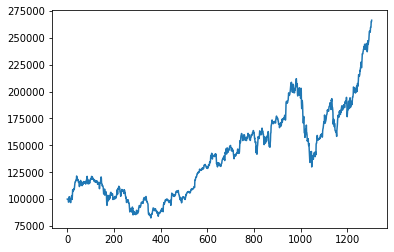

In [182]:
plt.plot(V_f)
plt.show()

In [183]:
M_g=[0]*5217
N_g=[0]*5217
M_g[0]=100000
V_g=[100000]
gamma0=0.5#中等保守的投资者

In [184]:
for i in range(len_testing):
    if cut_point_Gaussian[0]>testing_set_x[i]>cut_point_Gaussian[1]:
        #表示接受
        M_g[i+1]=M_g[i]-gamma0*M_g[i]
        N_g[i+1]=N_g[i]+gamma0*M_g[i]/apple_price[len_learning+i]
#     else:
#         M_g[i+1]=M_g[i]+gamma0*N_g[i]*apple_price[len_learning+i]
#         N_g[i+1]=N_g[i]-gamma0*N_g[i]
    else:
        M_g[i+1]=M_g[i]
        N_g[i+1]=N_g[i]
    V_g.append(M_g[i+1]+N_g[i+1]*apple_price[len_learning+i])
    print(M_g[i+1],N_g[i+1],V_g[i+1])

50000.0 444.36544614290796 100000.0
25000.0 670.855752357802 99049.05794525419
12500.0 784.100905465249 99049.05794525417
6250.0 841.2672824889387 98225.75199451567
3125.0 870.679047194821 95634.64876444974
1562.5 885.3835455949716 95643.35555492168
1562.5 885.3835455949716 96962.57703785818
781.25 892.3658496435908 100628.06491662137
390.625 895.8532614818195 100735.1488185786
195.3125 897.6410189188904 98262.59381688878
97.65625 898.5270309856659 99133.3056052401
48.828125 898.9717315776513 98755.92425222612
24.4140625 899.2002848682337 96076.98849212471
12.20703125 899.3154564056429 95330.65225568408
6.103515625 899.3730421743475 95330.65225568408
3.0517578125 899.4011120585684 97785.94066082005
1.52587890625 899.4150406656543 98532.44358382867
0.762939453125 899.4218283832088 101095.7764497258
0.3814697265625 899.4252048190962 101617.44111018805
0.19073486328125 899.4268912458272 101725.37213476632
0.19073486328125 899.4268912458272 98163.64164543286
0.095367431640625 899.427718298

1.1270725851789228e-126 899.4285232939857 101716.37169931685
5.635362925894614e-127 899.4285232939857 102489.88022934967
2.817681462947307e-127 899.4285232939857 100897.89174311933
1.4088407314736535e-127 899.4285232939857 101680.39455838507
7.044203657368268e-128 899.4285232939857 101203.69744103926
3.522101828684134e-128 899.4285232939857 101635.42313222039
1.761050914342067e-128 899.4285232939857 101680.39455838507
8.805254571710335e-129 899.4285232939857 102435.91451795203
4.402627285855167e-129 899.4285232939857 102588.81736691202
2.2013136429275836e-129 899.4285232939857 104378.68012826703
1.1006568214637918e-129 899.4285232939857 104603.53725909053
5.503284107318959e-130 899.4285232939857 105538.94292331628
2.7516420536594796e-130 899.4285232939857 105215.14865493045
1.3758210268297398e-130 899.4285232939857 105799.77719507153
6.879105134148699e-131 899.4285232939857 105727.82291320802
3.4395525670743494e-131 899.4285232939857 105655.86863134449
1.7197762835371747e-131 899.42852

1.204959932551442e-176 899.4285232939857 137198.82694326458
6.02479966275721e-177 899.4285232939857 137666.52977537745
3.012399831378605e-177 899.4285232939857 138502.99830204085
1.5061999156893026e-177 899.4285232939857 138332.10688261501
7.530999578446513e-178 899.4285232939857 137918.36976189975
3.7654997892232564e-178 899.4285232939857 138395.06687924557
1.8827498946116282e-178 899.4285232939857 138161.21546318915
9.413749473058141e-179 899.4285232939857 138161.21546318915
4.7068747365290705e-179 899.4285232939857 138215.18117458676
2.3534373682645353e-179 899.4285232939857 137396.70121838924
1.1767186841322676e-179 899.4285232939857 137774.46119817274
5.883593420661338e-180 899.4285232939857 139816.16394605007
2.941796710330669e-180 899.4285232939857 138449.0325906432
1.4708983551653345e-180 899.4285232939857 138916.7354227561
7.354491775826673e-181 899.4285232939857 139744.20966418655
7.354491775826673e-181 899.4285232939857 139402.42682533484
3.6772458879133364e-181 899.42852329

9.8813e-319 899.4285232939857 183357.49875871194
4.94066e-319 899.4285232939857 183357.49875871194
2.47033e-319 899.4285232939857 183960.1158693189
1.23516e-319 899.4285232939857 186613.43001303615
6.176e-320 899.4285232939857 186325.61288558206
3.088e-320 899.4285232939857 184634.68726178937
1.544e-320 899.4285232939857 183753.2473089613
7.72e-321 899.4285232939857 184032.07015118242
7.72e-321 899.4285232939857 180488.3217694041
3.86e-321 899.4285232939857 189347.69272384988
1.93e-321 899.4285232939857 188115.47564693712
9.63e-322 899.4285232939857 190453.98980750146
4.8e-322 899.4285232939857 187512.85853633014
2.4e-322 899.4285232939857 182458.07023541795
1.24e-322 899.4285232939857 182494.04737634968
6.4e-323 899.4285232939857 180533.2931955688
6.4e-323 899.4285232939857 177349.3162231081
3.5e-323 899.4285232939857 167041.86534615903
1.5e-323 899.4285232939857 169686.18520464335
5e-324 899.4285232939857 171718.89366728775
5e-324 899.4285232939857 170963.3737077208
5e-324 899.428523

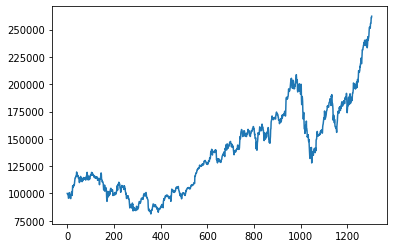

In [185]:
plt.plot(V_g)
plt.show()

The Fermi-Dirac Bayes detector performs better.

# 7 Transaction Cost

先计算1-day和5-day的转移矩阵（即出现概率）

1-day 主要是U 所以都当成U算

In [127]:
print(rule1)

[[860. 854. 156.]
 [841. 741. 139.]
 [169. 126.  25.]]


In [190]:
M_1=[0]*5217
N_1=[0]*5217
M_1[0]=100000
V_1=[100000]
gamma0=0.5#中等保守的投资者
e=0.002

In [191]:
for i in range(len_testing):
    if cut_point_FD[0]>testing_set_x[i]>cut_point_FD[1]:
        M_1[i+1]=M_1[i]-gamma0*M_1[i]
        N_1[i+1]=N_1[i]+(1-e)*gamma0*M_1[i]/apple_price[len_learning+i]
    else:
        M_1[i+1]=M_1[i]
        N_1[i+1]=N_1[i]

    V_1.append(M_1[i+1]+N_1[i+1]*apple_price[len_learning+i])
    print(M_1[i+1],N_1[i+1],V_1[i+1])

100000 0 100000.0
50000.0 452.07465120492844 99900.0
25000.0 678.1119768073927 99850.0
25000.0 678.1119768073927 99137.98242435225
12500.0 795.523741513275 97024.39753578547
6250.0 854.2240991266762 97019.85277320062
3125.0 883.1684146719198 98286.39668089936
1562.5 897.1050935529637 101939.58891764111
1562.5 897.1050935529637 102047.24152886747
781.25 904.2418212417509 99569.66897066128
390.625 907.7787814123188 100446.00228726579
390.625 907.7787814123188 100064.7351990726
195.3125 909.6035508843278 97359.16380546389
97.65625 910.5230804390028 96603.9975457299
48.828125 910.9828452163403 96603.8998894799
24.4140625 911.2069551719602 99090.83422879552
12.20703125 911.3181611709333 99847.11158752574
6.103515625 911.3723543078884 102444.35613983165
3.0517578125 911.3993117720137 102972.9460018146
3.0517578125 911.3993117720137 103082.31391922724
1.52587890625 911.4132647420379 99473.16959285227
0.762939453125 911.4198679297425 105096.58791043174
0.3814697265625 911.4230698371193 108368.

4.9090934652977266e-86 911.4262950147931 84981.38774717931
2.4545467326488633e-86 911.4262950147931 84507.44607377161
1.2272733663244316e-86 911.4262950147931 84571.24591442266
6.136366831622158e-87 911.4262950147931 85145.44448028198
6.136366831622158e-87 911.4262950147931 84316.04655181852
3.068183415811079e-87 911.4262950147931 82338.25149163642
1.5340917079055395e-87 911.4262950147931 82502.30822473907
7.670458539527698e-88 911.4262950147931 85564.70057598877
3.835229269763849e-88 911.4262950147931 85209.24432093301
1.9176146348819244e-88 911.4262950147931 86184.47045659884
9.588073174409622e-89 911.4262950147931 85856.35699039351
4.794036587204811e-89 911.4262950147931 86786.0118113086
2.3970182936024055e-89 911.4262950147931 87888.83762827651
1.1985091468012028e-89 911.4262950147931 89228.63428194825
5.992545734006014e-90 911.4262950147931 90796.2875093737
2.996272867003007e-90 911.4262950147931 91516.31428243537
1.4981364335015035e-90 911.4262950147931 91461.62870473448
7.490682

4.5965573598916705e-182 911.4262950147931 146694.06218263094
2.2982786799458352e-182 911.4262950147931 143877.75493103525
1.1491393399729176e-182 911.4262950147931 143549.6414648299
5.745696699864588e-183 911.4262950147931 143285.32783927565
2.872848349932294e-183 911.4262950147931 145627.69341746366
1.436424174966147e-183 911.4262950147931 145809.9786764666
7.182120874830735e-184 911.4262950147931 145162.86600700612
3.5910604374153675e-184 911.4262950147931 145700.60752106484
1.7955302187076838e-184 911.4262950147931 147168.00385603865
8.977651093538419e-185 911.4262950147931 148480.45772085994
4.4888255467692094e-185 911.4262950147931 148881.48529066646
2.2444127733846047e-185 911.4262950147931 149473.9123824261
1.1222063866923024e-185 911.4262950147931 149519.48369717682
5.611031933461512e-186 911.4262950147931 149519.48369717682
2.805515966730756e-186 911.4262950147931 147723.97389599768
1.402757983365378e-186 911.4262950147931 147569.03142584514
7.01378991682689e-187 911.426295014

1.6102871923992833e-227 911.4262950147931 157494.46377855627
8.051435961996417e-228 911.4262950147931 153465.95955459087
4.0257179809982083e-228 911.4262950147931 154988.04146726558
2.0128589904991042e-228 911.4262950147931 157904.6056113129
1.0064294952495521e-228 911.4262950147931 157166.35031235093
5.0321474762477604e-229 911.4262950147931 158715.77501387606
2.5160737381238802e-229 911.4262950147931 159253.5165279348
1.2580368690619401e-229 911.4262950147931 160246.9711895009
6.2901843453097005e-230 911.4262950147931 162452.62282343674
6.2901843453097005e-230 911.4262950147931 162088.0523054308
6.2901843453097005e-230 911.4262950147931 157494.46377855627
3.1450921726548502e-230 911.4262950147931 151041.56560985153
1.5725460863274251e-230 911.4262950147931 150604.08098824442
7.862730431637126e-231 911.4262950147931 148507.8005097104
3.931365215818563e-231 911.4262950147931 149154.9131791709
1.9656826079092814e-231 911.4262950147931 149674.42616732934
9.828413039546407e-232 911.426295

1.26480805e-316 911.4262950147931 186386.67733052518
6.3240403e-317 911.4262950147931 185338.5370912582
3.16202e-317 911.4262950147931 187443.93183274235
1.58101e-317 911.4262950147931 184645.85310704695
7.90505e-318 911.4262950147931 188865.75685296542
3.952525e-318 911.4262950147931 190342.2674508894
1.976263e-318 911.4262950147931 190187.32498073688
9.8813e-319 911.4262950147931 188683.4715939625
4.94066e-319 911.4262950147931 189339.69852637313
2.47033e-319 911.4262950147931 191107.86553870182
1.23516e-319 911.4262950147931 190287.58187318852
1.23516e-319 911.4262950147931 194170.25788995152
1.23516e-319 911.4262950147931 189968.58266993333
1.23516e-319 911.4262950147931 185949.1927089181
6.176e-320 911.4262950147931 176215.1598781601
3.088e-320 911.4262950147931 179550.98011791424
1.544e-320 911.4262950147931 181410.28975974442
7.72e-321 911.4262950147931 185411.45119485937
3.86e-321 911.4262950147931 183187.57103502328
1.93e-321 911.4262950147931 182722.74362456572
1.93e-321 911.

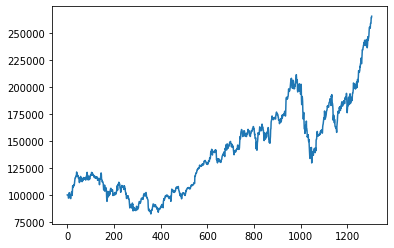

In [192]:
plt.plot(V_1)
plt.show()

5-days rule

In [134]:
print(rule2)

[[[[[ 88.  72.  20.]
    [ 87.  74.  12.]
    [ 25.  16.   4.]]

   [[ 78.  76.  15.]
    [ 91.  68.  22.]
    [ 14.  12.   4.]]

   [[ 21.  21.   3.]
    [ 18.  12.   1.]
    [  3.   3.   0.]]]


  [[[ 82.  85.  16.]
    [ 81.  78.  20.]
    [ 17.  15.   3.]]

   [[ 80.  92.  13.]
    [ 91.  64.  10.]
    [ 23.  15.   3.]]

   [[ 16.  12.   3.]
    [ 13.  15.   3.]
    [  4.   0.   0.]]]


  [[[ 23.  15.   2.]
    [ 19.  17.   2.]
    [  3.   1.   2.]]

   [[ 15.  12.   2.]
    [ 15.  11.   1.]
    [  1.   0.   0.]]

   [[  5.   3.   0.]
    [  4.   1.   0.]
    [  0.   0.   1.]]]]



 [[[[ 71.  82.  17.]
    [ 67.  88.  18.]
    [ 18.  12.   2.]]

   [[ 93.  88.  15.]
    [ 77.  82.  18.]
    [ 16.  17.   0.]]

   [[ 17.  15.   3.]
    [  8.  11.   0.]
    [  3.   2.   1.]]]


  [[[ 76.  75.  12.]
    [102.  89.   8.]
    [ 14.   4.   2.]]

   [[ 65.  90.   7.]
    [ 63.  36.  11.]
    [ 13.   9.   0.]]

   [[ 22.  11.   4.]
    [ 12.   9.   4.]
    [  1.   1.   1.]]]


  [[[ 22.  15

In [193]:
M_5=[0]*5217
N_5=[0]*5217
M_5[0]=M_5[1]=M_5[2]=M_5[3]=M_5[4]=M_5[5]=100000
V_5=[100000]*5
gamma0=0.5#中等保守的投资者
e=0.002

In [194]:
for i in range(4,len_testing):
    if count_U[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])]>count_D[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])] and cut_point_FD[0]>=testing_set_x[i]>=cut_point_FD[1]:
        #表示接受
        print("U")
        M_5[i+1]=M_5[i]-gamma0*M_5[i]
        N_5[i+1]=N_5[i]+(1-e)*gamma0*M_5[i]/apple_price[len_learning+i]
    elif count_U[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])]<count_D[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])] and (cut_point_FD[0]<testing_set_x[i] or testing_set_x[i]<cut_point_FD[1]):
        print("D")
        M_5[i+1]=M_5[i]+(1-e)*gamma0*N_5[i]*apple_price[len_learning+i]
        N_5[i+1]=N_5[i]-gamma0*N_5[i]
    else:
        print("H")
        M_5[i+1]=M_5[i]
        N_5[i+1]=N_5[i]
    V_5.append(M_5[i+1]+N_5[i+1]*apple_price[len_learning+i])
    print(i,M_5[i+1],N_5[i+1],V_5[i+1])

H
4 100000 0 100000.0
U
5 50000.0 469.6028609072087 99900.0
U
6 25000.0 701.1573852691577 100549.70826275174
H
7 25000.0 701.1573852691577 103452.49983776605
D
8 64189.78272327518 350.57869263457883 103458.10208527435
U
9 32094.89136163759 643.7658924415748 102426.31511087964
H
10 32094.89136163759 643.7658924415748 103050.76802654797
D
11 67366.95336168996 321.8829462207874 102709.70085673241
U
12 33683.47668084498 636.5815956074499 101683.12272363277
U
13 16841.73834042249 795.1631114461295 101121.07652259775
U
14 8420.869170211245 874.4538693654692 101104.23478425732
U
15 4210.434585105622 913.103737981505 103483.07297845485
H
16 4210.434585105622 913.103737981505 104240.9490809795
U
17 2105.217292552811 931.7959698139579 106839.08429964169
U
18 1052.6086462764056 941.0941060237636 107377.42074484122
H
19 1052.6086462764056 941.0941060237636 107490.35203756407
U
20 526.3043231382028 945.9067477178439 103762.56676906369
U
21 263.1521615691014 948.1843113050953 109598.28509815964
H
22

228 14949.668022461547 880.9982918141973 113921.01612486846
U
229 7474.834011230773 946.3355753106572 115522.69832232506
H
230 7474.834011230773 946.3355753106572 115063.72556829939
H
231 7474.834011230773 946.3355753106572 118470.53363941777
H
232 7474.834011230773 946.3355753106572 119880.57364663064
H
233 7474.834011230773 946.3355753106572 120372.66814579218
U
234 3737.4170056153866 978.0123665769345 118898.37317004941
H
235 3737.4170056153866 978.0123665769345 120003.52714428135
U
236 1868.7085028076933 993.8131891288457 119168.47921568535
H
237 1868.7085028076933 993.8131891288457 119168.47921568535
U
238 934.3542514038467 1001.7283537405174 118947.9716055742
H
239 934.3542514038467 1001.7283537405174 119438.81849890704
H
240 934.3542514038467 1001.7283537405174 118477.15927931615
U
241 467.17712570192333 1005.7380094977458 117414.39287009981
H
242 467.17712570192333 1005.7380094977458 116328.19581984225
U
243 233.58856285096167 1007.6965189972439 120179.7052190929
H
244 233.5885

528 0.0001202277499513593 1109.9981142382298 130879.87777005743
H
529 0.0001202277499513593 1109.9981142382298 132078.6757334347
U
530 6.011387497567965e-05 1109.9981147419126 132211.87550702307
U
531 3.0056937487839825e-05 1109.9981149924079 132922.27430039778
U
532 1.5028468743919913e-05 1109.9981151181807 132367.27524287152
U
533 7.514234371959956e-06 1109.998115181178 132134.17563868169
U
534 3.757117185979978e-06 1109.9981152126768 132134.17563867418
H
535 3.757117185979978e-06 1109.9981152126768 133199.77382927833
H
536 3.757117185979978e-06 1109.9981152126768 133188.6738481262
H
537 3.757117185979978e-06 1109.9981152126768 132955.57424393157
U
538 1.878558592989989e-06 1109.9981152283 133199.77382927458
H
539 1.878558592989989e-06 1109.9981152283 133288.57367849283
U
540 9.392792964949945e-07 1109.9981152361138 133166.47388581585
H
541 9.392792964949945e-07 1109.9981152361138 135286.57028591682
H
542 9.392792964949945e-07 1109.9981152361138 135353.17017283099
H
543 9.39279296494

H
828 223.93986092216633 1135.797831596606 200362.87576656014
H
829 223.93986092216633 1135.797831596606 201055.71244383405
U
830 111.96993046108317 1136.4303441375025 200885.11882923363
U
831 55.98496523054158 1136.7495636730112 199021.2610949177
U
832 27.99248261527079 1136.9074505140309 201192.39677656788
H
833 27.99248261527079 1136.9074505140309 204648.59542613052
H
834 27.99248261527079 1136.9074505140309 206626.81439002496
U
835 13.996241307635396 1136.9850648321117 204637.19835914279
U
836 6.998120653817698 1137.0242047357908 202897.59721370833
U
837 3.499060326908849 1137.0437516834888 203136.36529858218
H
838 3.499060326908849 1137.0437516834888 202420.02773502158
U
839 1.7495301634544245 1137.0537119293708 199327.26523138216
H
840 1.7495301634544245 1137.0537119293708 199259.0420086664
U
841 0.8747650817272122 1137.058809235096 194744.93702277666
H
842 0.8747650817272122 1137.058809235096 191993.2547044277
H
843 0.8747650817272122 1137.058809235096 187547.35476031847
H
844 0

1027 8050.5700501980355 1251.7706737897315 226759.94217473993
U
1028 4025.2850250990177 1275.6132428148892 218953.3603069797
U
1029 2012.6425125495089 1287.4565047696321 220365.2657214791
H
1030 2012.6425125495089 1287.4565047696321 219116.43291185255
H
1031 2012.6425125495089 1287.4565047696321 219721.5374690943
D
1032 111837.89656824345 643.7282523848161 221883.24131342774
U
1033 55918.948284121725 980.9720908399374 218250.20987631456
U
1034 27959.474142060863 1151.1779905213864 216683.59390813694
H
1035 27959.474142060863 1151.1779905213864 219135.60302794748
D
1036 120380.77456265879 575.5889952606932 212987.2880101517
H
1037 120380.77456265879 575.5889952606932 210650.39668939332
H
1038 120380.77456265879 575.5889952606932 207139.30381830304
U
1039 60190.38728132939 984.7016187488546 204774.12596222374
U
1040 30095.193640664696 1189.2579304929352 204713.93557494238
H
1041 30095.193640664696 1189.2579304929352 217010.8625762393
H
1042 30095.193640664696 1189.2579304929352 215797.81

1227 57.064922839126744 1530.9619840283785 341591.71912980994
U
1228 28.532461419563372 1531.0921572695065 334954.94186412415
U
1229 14.266230709781686 1531.1569035098355 336715.66931252263
U
1230 7.133115354890843 1531.1891592829402 337940.58056909975
H
1231 7.133115354890843 1531.1891592829402 341110.14212881547
U
1232 3.5665576774454215 1531.2052681920734 338338.68261739804
U
1233 1.7832788387227108 1531.2134421335654 333392.8860345799
U
1234 0.8916394193613554 1531.2175106053126 334908.7855590133
H
1235 0.8916394193613554 1531.2175106053126 333316.3193479838
U
1236 0.4458197096806777 1531.2195235812446 338445.8971168722
H
1237 0.4458197096806777 1531.2195235812446 336700.30685998953
H
1238 0.4458197096806777 1531.2195235812446 335061.90196975763
U
1239 0.22290985484033884 1531.2205168572866 342947.6820703813
D
1240 171604.73403446286 765.6102584286433 343553.14197495184
H
1241 171604.73403446286 765.6102584286433 339242.7562199986
U
1242 85802.36701723143 1153.395614298569 340495.1

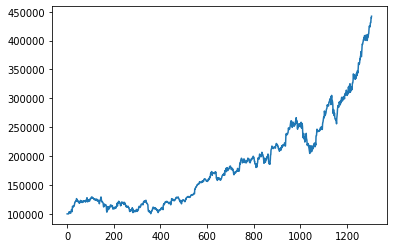

In [195]:
plt.plot(V_5)
plt.show()

"""\\\
Although 1-Day rules' final return is higher than 5-Day rules, I think the 5-Day rules is better than 1-Day rules, for the Apple stock mostly performs Upwards in the last 1/4 time. 1-Day rules' anti-risk ability is much weaker than 5-Day rules.\\\
"""\\\
hahaha, 5-Day rules performs better than 1-Day rules
看长线发展，不能恰烂钱 √

## Extra

In [196]:
M_5=[0]*5217
N_5=[0]*5217
M_5[0]=M_5[1]=M_5[2]=M_5[3]=M_5[4]=M_5[5]=100000
V_5=[100000]*5
gamma0=0.5#中等保守的投资者
e=0.001
for i in range(4,len_testing):
    if count_U[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])]>count_D[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])] and cut_point_FD[0]>=testing_set_x[i]>=cut_point_FD[1]:
        #表示接受
#         print("U")
        M_5[i+1]=M_5[i]-gamma0*M_5[i]
        N_5[i+1]=N_5[i]+(1-e)*gamma0*M_5[i]/apple_price[len_learning+i]
    elif count_U[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])]<count_D[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])] and (cut_point_FD[0]<testing_set_x[i] or testing_set_x[i]<cut_point_FD[1]):
#         print("D")
        M_5[i+1]=M_5[i]+(1-e)*gamma0*N_5[i]*apple_price[len_learning+i]
        N_5[i+1]=N_5[i]-gamma0*N_5[i]
    else:
#         print("H")
        M_5[i+1]=M_5[i]
        N_5[i+1]=N_5[i]
    V_5.append(M_5[i+1]+N_5[i+1]*apple_price[len_learning+i])
    print(i,M_5[i+1],N_5[i+1],V_5[i+1])

4 100000 0 100000.0
5 50000.0 470.07340485601355 99950.0
6 25000.0 701.8599477794475 100625.40937323547
7 25000.0 701.8599477794475 103531.10955704238
8 64268.358709012566 350.9299738897237 103576.02508440052
9 32134.179354506283 644.7702043258955 102575.32417711036
10 32134.179354506283 644.7702043258955 103200.75127530648
11 67496.66568778045 322.38510216294776 102894.54990527211
12 33748.332843890224 638.0056274489086 101900.09396798264
13 16874.166421945112 797.0516908088781 101353.67513077811
14 8437.083210972556 876.5747224888629 101345.23804756714
15 4218.541605486278 915.337811744573 103734.06849835624
16 4218.541605486278 915.337811744573 104493.79888210424
17 2109.270802743139 934.0848004629039 107100.40237477353
18 1054.6354013715695 943.4101745642511 107641.11692364067
19 1054.6354013715695 943.4101745642511 107754.32614458837
20 527.3177006857848 948.2369143753662 104017.89453561325
21 263.6588503428924 950.5211498405691 109868.25263845893
22 263.6588503428924 950.52114984

403 1.4401734174164849e-05 1128.023981992018 111426.20895557328
404 7.2008670870824245e-06 1128.0239820640772 112610.6341366577
405 3.6004335435412122e-06 1128.0239821000923 112655.75509593666
406 3.6004335435412122e-06 1128.0239821000923 112757.27725432566
407 1.8002167717706061e-06 1128.0239821181797 112159.42454381083
408 1.8002167717706061e-06 1128.0239821181797 111290.84607757982
409 9.001083858853031e-07 1128.0239821274174 109801.85442118293
410 9.001083858853031e-07 1128.0239821274174 109046.07835315756
411 9.001083858853031e-07 1128.0239821274174 116130.06896091774
412 9.001083858853031e-07 1128.0239821274174 117698.02229607485
413 9.001083858853031e-07 1128.0239821274174 117551.37917839827
414 9.001083858853031e-07 1128.0239821274174 119626.94330551272
415 4.5005419294265153e-07 1128.0239821317207 117855.94565357223
416 2.2502709647132576e-07 1128.0239821338457 119333.65707016458
417 2.2502709647132576e-07 1128.0239821338457 119423.89898873528
418 1.1251354823566288e-07 1128.0

653 8.492449379494858e-22 1129.9696380005682 162738.22726484184
654 4.246224689747429e-22 1129.9696380005682 162150.64305308156
655 2.1231123448737145e-22 1129.9696380005682 162150.64305308156
656 2.1231123448737145e-22 1129.9696380005682 162817.3251395019
657 1.0615561724368572e-22 1129.9696380005682 161280.5664318211
658 5.307780862184286e-23 1129.9696380005682 162919.02240692193
659 5.307780862184286e-23 1129.9696380005682 163913.39568836242
660 5.307780862184286e-23 1129.9696380005682 164444.48141822268
661 2.653890431092143e-23 1129.9696380005682 164681.77504220282
662 1.3269452155460716e-23 1129.9696380005682 166975.61340734398
663 6.634726077730358e-24 1129.9696380005682 168410.67484760468
664 3.317363038865179e-24 1129.9696380005682 168998.259059365
665 1.6586815194325894e-24 1129.9696380005682 169585.84327112528
666 8.293407597162947e-25 1129.9696380005682 170648.01473084584
667 4.146703798581474e-25 1129.9696380005682 169879.63537700544
668 2.073351899290737e-25 1129.96963800

903 0.0029858313948873966 1169.055549946158 220764.4530376639
904 0.0014929156974436983 1169.0555578481542 220647.54748117633
905 0.0014929156974436983 1169.0555578481542 217081.92802973944
906 0.0014929156974436983 1169.0555578481542 218028.86303159647
907 0.0014929156974436983 1169.0555578481542 216813.04525143438
908 0.0007464578487218492 1169.0555618807705 216181.7552494499
909 0.0007464578487218492 1169.0555618807705 212966.85245427777
910 0.0003732289243609246 1169.0555639024356 215608.9180237551
911 0.0003732289243609246 1169.0555639024356 215293.27302150146
912 0.0001866144621804623 1169.0555649074374 216859.80747694412
913 9.330723109023115e-05 1169.0555654109971 216403.87580653693
914 9.330723109023115e-05 1169.0555654109971 218823.82082693768
915 4.665361554511557e-05 1169.055565664406 215012.69968365115
916 2.3326807772557786e-05 1169.0555657911104 215012.6996836278
917 1.1663403886278893e-05 1169.055565853957 216742.90192098706
918 1.1663403886278893e-05 1169.055565853957 

1172 4.7289397297660924 1525.9547377931185 304798.92826652725
1173 4.7289397297660924 1525.9547377931185 302021.6906437437
1174 2.3644698648830462 1525.966457492424 307560.90397746296
1175 2.3644698648830462 1525.966457492424 309361.544397304
1176 1.1822349324415231 1525.9722353540624 311925.1668636563
1177 1.1822349324415231 1525.9722353540624 311925.1668636563
1178 1.1822349324415231 1525.9722353540624 311650.49186129257
1179 1.1822349324415231 1525.9722353540624 305226.14875045203
1180 1.1822349324415231 1525.9722353540624 307087.83487758395
1181 1.1822349324415231 1525.9722353540624 310124.5196259385
1182 1.1822349324415231 1525.9722353540624 307866.0807176145
1183 0.5911174662207616 1525.9751400581881 310231.33709129586
1184 0.5911174662207616 1525.9751400581881 313145.949608807
1185 0.2955587331103808 1525.9765838878916 312062.5069638069
1186 0.1477793665551904 1525.9773098853698 310307.6337445565
1187 0.0738896832775952 1525.9776688068596 313832.641256502
1188 0.0738896832775952

In [197]:
M_5=[0]*5217
N_5=[0]*5217
M_5[0]=M_5[1]=M_5[2]=M_5[3]=M_5[4]=M_5[5]=100000
V_5=[100000]*5
gamma0=0.5#中等保守的投资者
e=0.005
for i in range(4,len_testing):
    if count_U[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])]>count_D[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])] and cut_point_FD[0]>=testing_set_x[i]>=cut_point_FD[1]:
        #表示接受
#         print("U")
        M_5[i+1]=M_5[i]-gamma0*M_5[i]
        N_5[i+1]=N_5[i]+(1-e)*gamma0*M_5[i]/apple_price[len_learning+i]
    elif count_U[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])]<count_D[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])] and (cut_point_FD[0]<testing_set_x[i] or testing_set_x[i]<cut_point_FD[1]):
#         print("D")
        M_5[i+1]=M_5[i]+(1-e)*gamma0*N_5[i]*apple_price[len_learning+i]
        N_5[i+1]=N_5[i]-gamma0*N_5[i]
    else:
#         print("H")
        M_5[i+1]=M_5[i]
        N_5[i+1]=N_5[i]
    V_5.append(M_5[i+1]+N_5[i+1]*apple_price[len_learning+i])
    print(i,M_5[i+1],N_5[i+1],V_5[i+1])

4 100000 0 100000.0
5 50000.0 468.1912290607942 99750.0
6 25000.0 699.0496977382884 100322.60493130058
7 25000.0 699.0496977382884 103216.67067993709
8 63954.52693022368 349.5248488691442 103104.80525205651
9 31977.26346511184 640.7594223042588 101980.23035185212
10 31977.26346511184 640.7594223042588 102601.76699148725
11 66979.06728819312 320.3797111521294 102156.75957269693
12 33489.53364409656 632.3258446091232 101034.5803652431
13 16744.76682204828 789.5203251066989 100426.02608010729
14 8372.38341102414 868.1175653554867 100384.16416305218
15 4186.19170551207 906.4293823807305 102733.1941579451
16 4186.19170551207 906.4293823807305 103485.5305453211
17 2093.095852756035 924.9581223584196 106058.38880584239
18 1046.5479263780176 934.1749322959848 106589.63177717838
19 1046.5479263780176 934.1749322959848 106701.7327690539
20 523.2739631890088 938.9454801553678 102999.78366734585
21 261.6369815945044 941.2031230023588 108791.7690949965
22 261.6369815945044 941.2031230023588 112170.

350 226.8023419372294 1056.3813775525152 100773.18185738564
351 226.8023419372294 1056.3813775525152 99727.36429360864
352 113.4011709686147 1057.591525183508 98723.2349790789
353 56.70058548430735 1058.1999924241993 98173.00388305607
354 28.350292742153673 1058.503996533246 98246.93613106206
355 28.350292742153673 1058.503996533246 98913.793648878
356 28.350292742153673 1058.503996533246 97950.55501203274
357 28.350292742153673 1058.503996533246 95653.6013395556
358 14.175146371076837 1058.6598103935996 95844.06118319972
359 14.175146371076837 1058.6598103935996 99401.15814612221
360 14.175146371076837 1058.6598103935996 98988.2808200687
361 14.175146371076837 1058.6598103935996 100121.04681718987
362 7.087573185538418 1058.7346738258673 99739.89384758224
363 7.087573185538418 1058.7346738258673 100819.80321488461
364 7.087573185538418 1058.7346738258673 102100.87217021392
365 7.087573185538418 1058.7346738258673 103657.21214073795
366 3.543786592769209 1058.7700690041427 105478.21806

725 0.019151926840200957 1052.822095409513 164134.9838262699
726 0.019151926840200957 1052.822095409513 164819.3181882861
727 0.019151926840200957 1052.822095409513 164240.26603581084
728 0.009575963420100479 1052.8221561018092 165282.55986238646
729 0.009575963420100479 1052.8221561018092 168325.21589352068
730 0.009575963420100479 1052.8221561018092 168946.38096562074
731 0.009575963420100479 1052.8221561018092 168198.87723478847
732 0.004787981710050239 1052.8221866444544 164219.2094607837
733 0.0023939908550251196 1052.8222018893882 164503.47143920776
734 0.0023939908550251196 1052.8222018893882 164419.2456630566
735 0.0023939908550251196 1052.8222018893882 165398.3703108137
736 0.0023939908550251196 1052.8222018893882 164671.92299151004
737 0.0011969954275125598 1052.822209455683 165724.7451874145
738 0.0011969954275125598 1052.822209455683 171662.66244874455
739 0.0011969954275125598 1052.822209455683 175526.5199574469
740 0.0005984977137562799 1052.8222129785486 177969.067480391

1100 0.10698156250518645 1300.1532148606489 242517.68614951934
1101 0.053490781252593225 1300.1534977227202 244636.9356222883
1102 126189.40906146719 650.0767488613601 253012.88199682994
1103 63094.704530733594 978.6778009842594 250071.0984087764
1104 31547.352265366797 1144.9892108816844 247652.6159271759
1105 31547.352265366797 1144.9892108816844 245419.8869659566
1106 31547.352265366797 1144.9892108816844 247343.46884023785
1107 15773.676132683398 1228.1537284315996 247550.84776229487
1108 15773.676132683398 1228.1537284315996 249061.47684826574
1109 7886.838066341699 1269.188051146565 250606.3609676108
1110 3943.4190331708496 1289.411234004028 254114.9866546324
1111 1971.7095165854248 1299.4539827575602 255820.0450482748
1112 985.8547582927124 1304.4666327882273 256256.9301286209
1113 492.9273791463562 1306.956291378332 257963.31678067776
1114 246.4636895731781 1308.1818354619168 262013.6489655027
1115 123.23184478658905 1308.796450427143 261228.12370500164
1116 123.23184478658905 

1272 0.5884460984554424 1375.5044002435895 361263.0641260748
1273 0.2942230492277212 1375.5055018086632 365554.63638371957
1274 0.2942230492277212 1375.5055018086632 367397.8137561432
1275 0.1471115246138606 1375.5060514949714 366283.6535641206
1276 0.0735557623069303 1375.5063295753828 362019.5844367073
1277 0.03677788115346515 1375.5064692417761 360396.4867839189
1278 0.018388940576732574 1375.5065391363282 360080.1202040486
1279 0.018388940576732574 1375.5065391363282 366393.6952186844
1280 0.009194470288366287 1375.506573751705 363532.6415713084
1281 0.004597235144183144 1375.5065908299941 368415.68988514075
1282 0.004597235144183144 1375.5065908299941 368415.68988514075
1283 0.004597235144183144 1375.5065908299941 367604.1409965511
1284 180768.53056147665 687.7532954149971 362445.44107830233
1285 180768.53056147665 687.7532954149971 359206.12305689766
1286 180768.53056147665 687.7532954149971 360781.078103398
1287 90384.26528073833 1026.3794869743563 362970.1294313879
1288 90384.2

tax越高，最终受益越少。很合理，因为判别结果相同，交易次数相同，印花税越高交易成本越高，相应扣除本金也就越多。tax=0.1%时，V_5=396336.45677484793; tax=0.2%时，V_5=442219.2201044598; tax=0.5%时，v_5=458661.44275016163.

# 8 Risk-Free Interest

In [200]:
M_5=[0]*5217
N_5=[0]*5217
M_5[0]=M_5[1]=M_5[2]=M_5[3]=M_5[4]=M_5[5]=100000
V_5=[100000]*5
r=1e-5
gamma0=0.5#中等保守的投资者
e=0.002

for i in range(4,len_testing):
    M_5[i]=(1+r)*M_5[i]
    if count_U[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])]>count_D[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])] and cut_point_FD[0]>=testing_set_x[i]>=cut_point_FD[1]:
        #表示接受
#         print("U")
        M_5[i+1]=M_5[i]-gamma0*M_5[i]
        N_5[i+1]=N_5[i]+(1-e)*gamma0*M_5[i]/apple_price[len_learning+i]
    elif count_U[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])]<count_D[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])] and (cut_point_FD[0]<testing_set_x[i] or testing_set_x[i]<cut_point_FD[1]):
#         print("D")
        M_5[i+1]=M_5[i]+(1-e)*gamma0*N_5[i]*apple_price[len_learning+i]
        N_5[i+1]=N_5[i]-gamma0*N_5[i]
    else:
#         print("H")
        M_5[i+1]=M_5[i]
        N_5[i+1]=N_5[i]
    V_5.append(M_5[i+1]+N_5[i+1]*apple_price[len_learning+i])
    print(i+1,M_5[i+1],N_5[i+1],V_5[i+1])

5 100001.0 0 100001.0
6 50001.000005 469.61225301138717 99901.99800999
7 25000.750007500028 701.1737240785336 100552.21877696202
8 25001.000015000103 701.1737240785336 103455.32800214723
9 64191.94597318449 350.5868620392668 103461.18039020276
10 32096.293946322112 643.7868744734038 102430.00998254148
11 32096.614909261578 643.7868744734038 103054.80421372016
12 67370.14748518336 321.8934372367019 102714.04689377322
13 33685.41059332911 636.6101548190128 101688.10733109605
14 16842.873723717523 795.202361407088 101126.37200925477
15 8421.52107622738 874.4992576621585 101109.69739583955
16 4210.802645719072 913.15250490671 103488.74297917658
17 4210.8447537455295 913.15250490671 104246.7016662756
18 2105.4434310965335 931.8467446240974 106845.01752684508
19 1052.7322427654224 941.1459726138291 107383.40422867585
20 1052.7427700878502 941.1459726138291 107496.35227271191
21 526.3766487577756 945.9592756691733 103768.37199529135
22 263.1909562621316 948.2371750217845 109604.41960802411
23

292 53010.634495242324 544.2690598187403 104318.87876435497
293 26505.58230079364 826.5803846446961 103956.16434200166
294 26505.84735661665 826.5803846446961 104196.13770937163
295 26506.112415090218 826.5803846446961 104196.4027678452
296 13253.188738107185 963.4458892042053 106360.59947080158
297 13253.321269994567 963.4458892042053 107786.6319187112
298 6626.726901603634 1032.1501635424602 105981.50164420085
299 3313.3965844363256 1066.581335879689 105747.86808232167
300 3313.4297184021702 1066.581335879689 106643.82953842643
301 3313.4628526993547 1066.581335879689 104308.04954714712
302 3313.4959873278817 1066.581335879689 105811.962365366
303 3313.5291222877554 1066.581335879689 106515.93918200648
304 3313.5622575789785 1066.581335879689 106675.95951767964
305 1656.7976966007773 1083.6822160245601 106438.0311640155
306 828.4071322888717 1091.9061324477602 110597.73062726221
307 828.4154163601946 1091.9061324477602 110837.95826047203
308 828.4237005143583 1091.9061324477602 11165

667 8.165566973012661e-25 1110.4247342260169 167696.3433628131
668 4.082824314341196e-25 1110.4247342260169 166941.25454353937
669 2.04143257129217e-25 1110.4247342260169 166863.52481214356
670 1.0207264928089415e-25 1110.4247342260169 168884.49782843492
671 1.0207367000738696e-25 1110.4247342260169 169606.27390568182
672 85032.48407744795 555.2123671130084 170235.37393461022
673 42516.667201144366 837.0377780238883 168541.075060421
674 21258.54618390819 978.9510160943926 167611.72309001986
675 21258.75876937003 978.9510160943926 166858.14339308903
676 21258.971356957725 978.9510160943926 168150.57132192134
677 21259.183946671295 978.9510160943926 175091.54661574413
678 21259.396538510762 978.9510160943926 173554.80611231542
679 10629.804566238074 1046.7849246378134 174336.4989303457
680 10629.910864283736 1046.7849246378134 176869.8247460149
681 10630.01716339238 1046.7849246378134 178199.34789941358
682 10630.123463564014 1046.7849246378134 179225.30342573026
683 5315.114882399325 10

1042 30114.27572286557 1189.9681595789007 217141.57136388138
1043 30114.5768656228 1189.9681595789007 215928.10498386814
1044 30114.878011391458 1189.9681595789007 216023.6035824031
1045 30115.179160171574 1189.9681595789007 217820.75665214736
1046 15057.740155981588 1285.236478810989 217790.942323627
1047 116337.19855556499 642.6182394054945 217819.4709224807
1048 116338.36192755055 642.6182394054945 207712.2493886178
1049 116339.52531116983 642.6182394054945 211614.10548542842
1050 58170.344353211476 1035.0606355692546 211286.86417297134
1051 58170.926056655015 1035.0606355692546 214206.31686872014
1052 58171.50776591559 1035.0606355692546 216856.65380503802
1053 58172.08948099325 1035.0606355692546 217364.4152315446
1054 29086.335600944032 1225.671725790163 215743.88272152795
1055 14543.313232150022 1322.4332364947345 212908.2987063602
1056 7271.729332641172 1369.8441326466643 216953.77071686607
1057 3635.901024967249 1393.263709404876 219508.18016015872
1058 3635.937383977499 1393.

1292 25233.549851874446 1427.432268244991 411739.3851245707
1293 25233.802187372967 1427.432268244991 412724.56572515826
1294 12617.02726269742 1473.1956453417456 417966.80907847866
1295 6308.576716485024 1495.6924636189271 424893.069584878
1296 3154.3199011260945 1506.9189222378204 425709.4548858334
1297 1577.175722162553 1512.545651953693 424696.69639968866
1298 1577.1914939197748 1512.545651953693 425120.2249539929
1299 788.603632917357 1515.3620934998264 424241.38704050885
1300 394.3057594768431 1516.7477172602414 431150.6574613854
1301 197.15485126721893 1517.439878028401 431559.78897840076
1302 98.5784114078658 1517.7859618732846 431559.59379312646
1303 98.57939719197988 1517.7859618732846 440119.90760387597
1304 98.5803829859518 1517.7859618732846 439952.9521338638
1305 98.58136878978166 1517.7859618732846 442563.54497408966


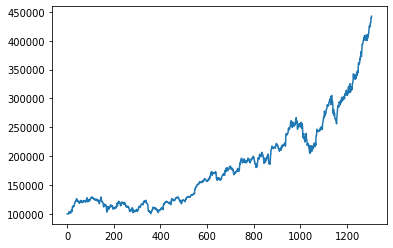

In [201]:
plt.plot(V_5)
plt.show()

In [205]:
pr=[]
for i in range(len(V_5)):
    pr.append(V_5[i]/(M_5[0]*(1+r)**i))
    print(pr[i])

1.0
0.999990000099999
0.9999800002999958
0.9999700005999899
0.9999600009999797
0.9999600009999796
0.9989600409989796
1.0054518040318534
1.0344705194833377
1.0345186934952582
1.0241976754488566
1.030434688653888
1.0270172200927807
1.0167488880245843
1.0111221537894366
1.010945321544777
1.0347218618766225
1.0422898132186578
1.0682578725061813
1.0736300342201412
1.074748552595151
1.0374658303403783
1.0958030940848018
1.1298260484048837
1.1133194090685514
1.1272439044530156
1.1274222565730647
1.136035006245776
1.1396288091886166
1.130025723050658
1.137518104281645
1.1593567745207993
1.1865149653083282
1.2015126672614447
1.2073908082581923
1.2073787348819889
1.214492007357384
1.2228878566431234
1.2203579677278615
1.2302737930719725
1.2635605176072706
1.2556625993769193
1.2235392098901987
1.2389647344008146
1.2203797069331932
1.2263524878694068
1.228905192225975
1.2211030784963819
1.2008565210444344
1.2026494363140507
1.2065593755640933
1.1940616126663222
1.1826713005140372
1.198294782271571

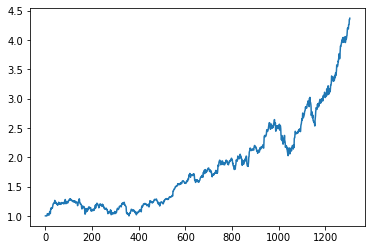

In [206]:
plt.plot(pr)
plt.show()

## Extra

### r = 0.005%

In [207]:
M_5=[0]*5217
N_5=[0]*5217
M_5[0]=M_5[1]=M_5[2]=M_5[3]=M_5[4]=M_5[5]=100000
V_5=[100000]*5
r=5e-5
gamma0=0.5#中等保守的投资者
e=0.002

for i in range(4,len_testing):
    M_5[i]=(1+r)*M_5[i]
    if count_U[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])]>count_D[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])] and cut_point_FD[0]>=testing_set_x[i]>=cut_point_FD[1]:
        #表示接受
#         print("U")
        M_5[i+1]=M_5[i]-gamma0*M_5[i]
        N_5[i+1]=N_5[i]+(1-e)*gamma0*M_5[i]/apple_price[len_learning+i]
    elif count_U[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])]<count_D[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])] and (cut_point_FD[0]<testing_set_x[i] or testing_set_x[i]<cut_point_FD[1]):
#         print("D")
        M_5[i+1]=M_5[i]+(1-e)*gamma0*N_5[i]*apple_price[len_learning+i]
        N_5[i+1]=N_5[i]-gamma0*N_5[i]
    else:
#         print("H")
        M_5[i+1]=M_5[i]
        N_5[i+1]=N_5[i]
    V_5.append(M_5[i+1]+N_5[i+1]*apple_price[len_learning+i])
    print(i+1,M_5[i+1],N_5[i+1],V_5[i+1])

5 100005.00000000001 0 100005.00000000001
6 50005.00012500001 469.64982236730674 99909.99024975003
7 25003.750187503134 701.239081644598 100562.26123470855
8 25005.00037501251 701.239081644598 103466.64122022656
9 64200.59960300197 350.619540822299 103473.49437050767
10 32101.904816491064 643.8708086196269 102444.7906581853
11 32103.509911731893 643.8708086196269 103070.95043778716
12 67382.92546565857 321.93540430981346 102731.43285887608
13 33693.14730596593 636.7244046033353 101708.0482056942
14 16847.415981665617 795.3593810133956 101147.55677527541
15 8424.12917623235 874.680835092836 101131.55088772204
16 4212.275191345581 913.3475996344373 103511.42622360161
17 4212.485805105149 913.3475996344373 104269.71534505775
18 2106.348214697702 932.0498729286393 106868.75393187677
19 1053.2267660542186 941.3534692511929 107407.34172205398
20 1053.2794273925215 941.3534692511929 107520.35679970244
21 526.6660456819457 946.169418615226 103791.59639334772
22 263.3461894921149 948.4486615006

319 6.48845454167455 1101.3686775664187 116663.45878237674
320 6.488778964401634 1101.3686775664187 116652.4454200238
321 6.489103403349855 1101.3686775664187 117544.55437329155
322 3.2447139292600116 1101.3991894339529 116894.74068855468
323 3.244876164956475 1101.3991894339529 116388.09722365077
324 1.6225192043823615 1101.414513311742 116388.09414085616
325 1.6226003303425809 1101.414513311742 115859.41525559248
326 1.6226814603590982 1101.414513311742 118601.93747486874
327 1.6227625944321162 1101.414513311742 120672.59684102889
328 1.6228437325618381 1101.414513311742 120044.79064957931
329 0.8114624373742332 1101.421876158478 121146.20362110836
330 0.811503010496102 1101.421876158478 122390.81038174058
331 0.8115435856466269 1101.421876158478 120947.94776454811
332 60985.48350205663 550.710938079239 122092.369191329
333 30494.26638811587 831.0986094938294 120701.70946257611
334 30495.79110143528 831.0986094938294 120802.96600903478
335 30497.315890990354 831.0986094938294 121103.

568 4.616063165989173e-10 1112.1329974219962 154542.00132176105
569 4.616293969147473e-10 1112.1329974219962 155453.95037964708
570 2.3082623919229656e-10 1112.1329974219977 154964.6118607814
571 1.1541889025212811e-10 1112.1329974219987 155164.79580031737
572 1.1542466119664073e-10 1112.1329974219987 154586.48664165792
573 1.1543043242970058e-10 1112.1329974219987 154230.6040824829
574 5.7718101975661036e-11 1112.132997421999 154742.185261297
575 5.7720987880759825e-11 1112.132997421999 154808.91324114232
576 5.7723873930153867e-11 1112.132997421999 154575.36531168374
577 2.886338006192519e-11 1112.1329974219993 156210.20081789407
578 2.886482323092829e-11 1112.1329974219993 156465.9914073011
579 2.886626647208984e-11 1112.1329974219993 155687.49830910572
580 2.8867709785413448e-11 1112.1329974219993 157322.33381531606
581 1.4434576585451361e-11 1112.1329974219993 155520.6783594924
582 7.217649157140317e-12 1112.1329974219993 157277.84849541914
583 7.218010039598175e-12 1112.132997421

818 7183.364935553243 1098.0123236579789 197128.51680514702
819 3591.862051900011 1118.8015037762657 196506.80534804153
820 3592.0416450026064 1118.8015037762657 196506.98494114412
821 1796.1106235424284 1129.2322189481908 195854.667449789
822 898.1002145368028 1134.4716181070598 194972.1599241115
823 898.1451195475297 1134.4716181070598 196594.49924301534
824 449.0950134017536 1137.0254461604784 199997.06081456572
825 449.1174681524237 1137.0254461604784 203942.56156749325
826 224.5699620129157 1138.2817992188834 203282.6601246695
827 224.5811905110164 1138.2817992188834 202975.3352673785
828 224.59241957054195 1138.2817992188834 199423.90728287515
829 224.6036491915205 1138.2817992188834 200801.239489551
830 224.6148793739801 1138.2817992188834 201495.60261725695
831 112.31305505897441 1138.9162500534837 201324.64695200793
832 56.15933535586369 1139.2364638264664 199456.71759890227
833 28.081071661315743 1139.3948503389452 201632.60589063427
834 28.082475714898813 1139.3948503389452 

1068 57.00461436809289 1419.8673925459955 236379.73342972356
1069 28.503732299405648 1420.0382232260026 236493.26866389337
1070 14.25257874301031 1420.1212835097137 243210.0223797815
1071 14.253291371947462 1420.1212835097137 247370.9784530939
1072 123487.77829096405 710.0606417548569 247208.74451033032
1073 61746.976339939305 1070.558374218057 244748.22482877396
1074 61750.06368875631 1070.558374218057 244183.9162392554
1075 61753.15119194075 1070.558374218057 243137.85653570615
1076 30878.119424750177 1250.8870253146729 244642.2031807746
1077 30879.663330721418 1250.8870253146729 243755.61729877244
1078 15440.603656943978 1341.1078827481042 244501.83003032018
1079 7720.6878435634135 1386.3211585835477 243977.5396893716
1080 3860.536938977796 1408.9289268331654 243970.20464988583
1081 1930.3649829123726 1420.1996473207716 244685.0906994519
1082 1930.4615011615185 1420.1996473207716 246247.40682975386
1083 965.2790121182884 1425.8312879971077 244867.97913690354
1084 482.6636380344472 1

In [209]:
pr=[]
for i in range(len(V_5)):
    pr.append(V_5[i]/(M_5[0]*(1+r)**i))
    print(pr[i])

1.0
0.9999500024998749
0.9999000074994998
0.9998500149987499
0.9998000249974998
0.9998000249975
0.9988002249725024
1.0052707148157882
1.0342526387418431
1.0342694293667514
1.0239358234619804
1.0301427841806894
1.0266981402711663
1.0164196110715784
1.010767800296874
1.010557325554271
1.0342865226595181
1.0418112595755387
1.0677261772450537
1.0730535574805358
1.074128928703981
1.0368267513381142
1.0950843880223546
1.1290399417914063
1.1125004086645849
1.1263696968498669
1.1265029560045925
1.1350633739080112
1.138608608700251
1.1289689902132782
1.1364089206334418
1.1581799738603342
1.1852631915604648
1.200197068383674
1.2060205356532683
1.205960239696414
1.213016636318201
1.2213534333057543
1.2187779685685074
1.2286318112569423
1.2618236373386693
1.2538864206889866
1.2217596011391567
1.2371132055879484
1.2185072121202956
1.2244218523320312
1.2269214616456812
1.219083179480745
1.1988221606728886
1.2005640165060776
1.2044189995625694
1.1919197947859337
1.1805269385564185
1.1960860443377554


2.0867673949818246
2.0281315748807995
2.0058365130733518
1.9723639452688875
1.949804370463211
1.9491623797151025
2.0661549993263555
2.0545175445307304
2.0553348700191947
2.072341007273774
2.0719651427020773
2.072138670724919
1.9759352804937678
2.0129949648777097
2.0098258670126445
2.037516092883342
2.062643960858695
2.0673920939514923
2.0518992244093286
2.0248410758981645
2.06321679564305
2.087407224003647
2.09949318482587
2.1120732585619995
2.1119685247835767
2.064831522055291
2.073035603028488
2.0565316506754447
2.124498764084949
2.1047422738787644
2.082834401350465
2.2249779794101574
2.2408846049455975
2.2418488287969227
2.305405334629162
2.344730100697494
2.3430751965866277
2.319638103415803
2.314174075200235
2.3041451754905067
2.3182855070910007
2.3097685279393163
2.316723620837065
2.311640240355393
2.311455169509259
2.3181123329944318
2.332796857698747
2.3196130253745113
2.345285015116812
2.3622134852299226
2.3634476307790213
2.3706454249810025
2.3472163345729786
2.37176306311644

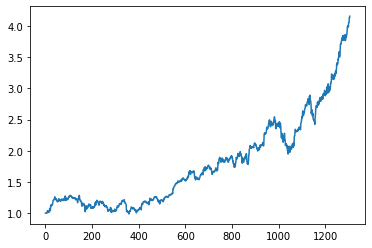

In [210]:
plt.plot(pr)
plt.show()

### r = 0.01%

In [211]:
M_5=[0]*5217
N_5=[0]*5217
M_5[0]=M_5[1]=M_5[2]=M_5[3]=M_5[4]=M_5[5]=100000
V_5=[100000]*5
r=1e-4
gamma0=0.5#中等保守的投资者
e=0.002

for i in range(4,len_testing):
    M_5[i]=(1+r)*M_5[i]
    if count_U[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])]>count_D[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])] and cut_point_FD[0]>=testing_set_x[i]>=cut_point_FD[1]:
        #表示接受
#         print("U")
        M_5[i+1]=M_5[i]-gamma0*M_5[i]
        N_5[i+1]=N_5[i]+(1-e)*gamma0*M_5[i]/apple_price[len_learning+i]
    elif count_U[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])]<count_D[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])] and (cut_point_FD[0]<testing_set_x[i] or testing_set_x[i]<cut_point_FD[1]):
#         print("D")
        M_5[i+1]=M_5[i]+(1-e)*gamma0*N_5[i]*apple_price[len_learning+i]
        N_5[i+1]=N_5[i]-gamma0*N_5[i]
    else:
#         print("H")
        M_5[i+1]=M_5[i]
        N_5[i+1]=N_5[i]
    V_5.append(M_5[i+1]+N_5[i+1]*apple_price[len_learning+i])
    print(i+1,M_5[i+1],N_5[i+1],V_5[i+1])

5 100010.0 0 100010.0
6 50010.0005 469.6967861754188 99919.980999
7 25007.500750025 701.3207838415436 100574.81520895133
8 25010.001500100003 701.3207838415436 103480.78400413031
9 64211.418058297575 350.6603919207718 103488.88855734322
10 32108.9196000517 643.9757398461868 102463.2691782476
11 32112.130492011704 643.9757398461868 103091.1365378584
12 67398.90128638144 321.9878699230934 102753.16940393709
13 33702.82058825504 636.8672459489176 101732.97980051841
14 16853.09543515693 795.555699994456 101174.0440775693
15 8427.390372350223 874.9078614399274 101158.87460636813
16 4214.1165556937285 913.5915288661814 103539.78757402497
17 4214.537967349298 913.5915288661814 104298.48995463947
18 2107.4797105730163 932.303848716287 106898.43230628368
19 1053.8452292720367 941.6129081853389 107437.27159605164
20 1053.9506137949638 941.6129081853389 107550.37052955679
21 527.0280044281717 946.432167379212 103820.63475219537
22 263.54035361430726 948.7130907415144 109659.64684701835
23 263.566

308 832.1225369793134 1095.164399964853 111991.30913341188
309 416.10287461650563 1099.1957626370913 113644.2583838633
310 208.07224245198364 1101.2342047492646 112390.80068025956
311 104.04652483811442 1102.2620027477644 111465.57666244474
312 104.05692949059824 1102.2620027477644 111564.79064734455
313 104.0673351835473 1102.2620027477644 111619.91415317488
314 104.07774191706565 1102.2620027477644 112821.39014290346
315 52.04407484562868 1102.7686354701204 113107.88458324237
316 26.02463962655662 1103.0169868790638 115379.54112743905
317 13.013621045259638 1103.1395460354588 116912.71131442284
318 6.507461203682082 1103.200930215811 116725.16587803648
319 6.5081119498024504 1103.200930215811 116857.55064040852
320 6.50876276099743 1103.200930215811 116846.51928191754
321 6.50941363727353 1103.200930215811 117740.11268626864
322 3.255032289318629 1103.2315391126804 117089.21827831809
323 3.255357792547561 1103.2315391126804 116581.73209582947
324 1.627841664163408 1103.246913258425 1

558 7.426162342719601e-09 1114.2723538188854 150811.19172762448
559 7.426904958953872e-09 1114.2723538188854 151229.04386030656
560 7.4276476494497675e-09 1114.2723538188854 151229.04386030656
561 3.7141952071073562e-09 1114.2723538189125 152321.03076704906
562 1.8572833133140334e-09 1114.272353818926 152777.8824321148
563 1.8574690416453649e-09 1114.272353818926 152131.60446689982
564 9.288273942747647e-10 1114.2723538189327 152276.4598728963
565 9.289202770141922e-10 1114.2723538189327 152577.3134084274
566 4.645065845209468e-10 1114.2723538189362 152644.16974965655
567 4.6455303517939887e-10 1114.2723538189362 155764.13234034955
568 4.645994904829168e-10 1114.2723538189362 154839.28628667985
569 4.646459504319651e-10 1114.2723538189362 155752.98961681136
570 2.3234620751350413e-10 1114.2723538189377 155262.709781131
571 1.1618472106712773e-10 1114.2723538189387 155463.27880481846
572 1.1619633953923445e-10 1114.2723538189387 154883.8571808326
573 1.1620795917318838e-10 1114.27235381

808 93645.78771208198 559.2648386060592 187479.24233340658
809 93655.15229085318 559.2648386060592 183417.15888712567
810 46832.25890304113 857.9330882401257 181090.2078817384
811 46836.942128931434 857.9330882401257 186705.77350471914
812 115142.07362716133 428.96654412006285 183579.39607607614
813 115153.58783452405 428.96654412006285 181707.7471547518
814 57582.55159665375 796.3815846766797 182144.59525593324
815 28794.154925906707 972.993757352329 187109.96918470418
816 28797.034341399296 972.993757352329 188698.82842468104
817 14399.957022416718 1058.8583514156132 191621.0792988479
818 7200.69850905948 1100.4000423344025 197558.90183248778
819 3600.709289455193 1121.2404289891394 196936.19646005254
820 3601.0693603841382 1121.2404289891394 196936.55653098147
821 1800.7147336600883 1131.6978820248844 196282.99575963645
822 900.4474025667272 1136.9509743716524 195398.65058832528
823 900.5374473069838 1136.9509743716524 197024.58052641703
824 450.31375052585724 1139.5117329074062 200

1058 3659.684081337138 1401.271846018845 222061.91400183435
1059 1830.0250248726359 1412.9180963365525 223403.84089237076
1060 1830.208027375123 1412.9180963365525 223404.02389487327
1061 915.1955240889303 1418.8761206877641 218428.90482552318
1062 457.64352182066955 1421.8434299053904 219307.78425285834
1063 228.8446430864258 1423.3390877560796 217572.72334343978
1064 114.43376377536723 1424.063003173472 224774.6131444223
1065 114.44520715174477 1424.063003173472 222695.49260316545
1066 114.45665167245994 1424.063003173472 220388.52198254512
1067 57.23404866881359 1424.408658729124 235440.76490365656
1068 57.23977207368047 1424.408658729124 237135.81693094908
1069 28.62274802544392 1424.5802027029974 237249.71810212857
1070 14.312805150123232 1424.6636139703833 243987.95669757825
1071 14.314236430638244 1424.6636139703833 248162.222517792
1072 123882.77632885588 712.3318069851916 247999.47037795567
1073 61947.58230324438 1074.0007384151547 245537.26852793092
1074 61953.777061474706 10

In [212]:
pr=[]
for i in range(len(V_5)):
    pr.append(V_5[i]/(M_5[0]*(1+r)**i))
    print(pr[i])

1.0
0.9999000099990001
0.9998000299960006
0.9997000599900017
0.9996000999800037
0.9996000999800035
0.9986004998800236
1.0050444099080718
1.0339803661759497
1.0339579511057093
1.023608622413328
1.0297780429834313
1.0262994571073638
1.0160081945751938
1.010325065919736
1.0100725761635103
1.0337426464356931
1.0412134199739151
1.0670619780265136
1.0723334476802218
1.0733549547874344
1.03602851061126
1.0941867284104898
1.1280581422550808
1.1114775716550807
1.1252779604583367
1.1253549568015995
1.1338500777283897
1.1373347208795572
1.127649544195127
1.1350240454781486
1.156710740470235
1.1837004238613225
1.198554691724318
1.2043099811625624
1.2041895663147
1.2111750482681916
1.2194382204020537
1.2168059575399384
1.226582530620007
1.2596560152081042
1.2516698532825914
1.2195388524893975
1.2348028122265438
1.2161707612706507
1.2220129627720584
1.2244464352011024
1.216563139855107
1.1962841926144236
1.1979624657281873
1.2017490108230353
1.1892480673469366
1.1778520979045328
1.1933309970085728
1

2.284614314168021
2.3240483795505456
2.3518836516941404
2.2859524326160545
2.2581971134726855
2.2744283553953624
2.332902280264195
2.318844450545073
2.2804919326945945
2.182208444631011
2.1619039075097217
2.105441762189486
2.1530099854143567
2.172768830303691
2.1329441483866782
2.085690879187813
2.083260146050207
2.083081096400626
2.0374301480705657
2.0608501067404212
2.056533080095398
2.129642370807296
2.113640102407329
2.1024136215878233
2.1731109440791494
2.080535387632033
2.0803346687801696
2.0577571178554095
1.9867272312320365
1.999341852922102
1.987814571958732
1.9931064938424725
2.0125157134301177
1.9794674315638716
1.9651130978424
1.9871766640898947
1.931256274663865
1.9099857361226515
1.878075033517542
1.8565572325608848
1.85588037496302
1.9671871150723883
1.9560232199716119
1.9567171503739438
1.9728216769539124
1.9723788042932988
1.9724521922621703
1.880838162010118
1.9160691005256796
1.9130096628113678
1.9392944754058157
1.9631380591674124
1.9675848221929217
1.95276952033419

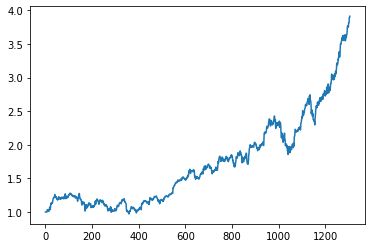

In [213]:
plt.plot(pr)
plt.show()

日利率变高之后$\rho_r$的值也变小了,我觉得合理。因为test_set的整体趋势上升，股票的份额呈现越来越大的趋势。在其他条件不变的情况下，每日的现金和股票份额相同，$\rho_r$=(现金\*(1-p)+股票\*p)/(现金)，现金变大，p变大，$\rho_r$变小。感受一下……

# 9 Greed

In [244]:
gamma=[0.1, 0.3, 0.5, 0.7, 0.9]
V=[[],[],[],[],[]]
for g in range(len(gamma)):
    M_5=[0]*5217
    N_5=[0]*5217
    M_5[0]=M_5[1]=M_5[2]=M_5[3]=M_5[4]=M_5[5]=100000
    r=1e-5
    gamma0=gamma[g]
    e=0.002
    for i in range(4,len_testing):
        M_5[i]=(1+r)*M_5[i]
        if count_U[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])]>count_D[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])] and cut_point_FD[0]>=testing_set_x[i]>=cut_point_FD[1]:
            #表示接受
    #         print("U")
            M_5[i+1]=M_5[i]-gamma0*M_5[i]
            N_5[i+1]=N_5[i]+(1-e)*gamma0*M_5[i]/apple_price[len_learning+i]
        elif count_U[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])]<count_D[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])] and (cut_point_FD[0]<testing_set_x[i] or testing_set_x[i]<cut_point_FD[1]):
    #         print("D")
            M_5[i+1]=M_5[i]+(1-e)*gamma0*N_5[i]*apple_price[len_learning+i]
            N_5[i+1]=N_5[i]-gamma0*N_5[i]
        else:
    #         print("H")
            M_5[i+1]=M_5[i]
            N_5[i+1]=N_5[i]
        V[g].append(M_5[i+1]+N_5[i+1]*apple_price[len_learning+i])
#         print(i+1,M_5[i+1],N_5[i+1],V_5[i+1])

In [230]:
for i in range(len(gamma)):
    print(V[i][-1]/gamma[i],np.max(V[i])/gamma[i],np.mean(V[i])/gamma[i])

2918787.962753252 2918787.962753252 1457536.5819923156
1227697.8491610116 1227697.8491610116 559360.1749414236
885127.0899481793 885127.0899481793 371885.02242306387
772938.7380851991 772938.7380851991 298263.5162742142
748969.2449768443 748969.2449768443 264431.078714061


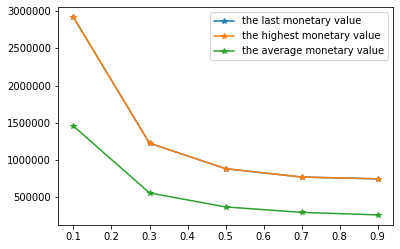

In [245]:
line1=[]
line2=[]
line3=[]
for i in range(len(gamma)):
    line1.append(V[i][-1]/gamma[i])
    line2.append(np.max(V[i])/gamma[i])
    line3.append(np.mean(V[i])/gamma[i])
#写report的话把time加上或许好看一点
plt.plot(gamma,line1,'*-',label="the last monetary value")
plt.plot(gamma,line2,'*-',label="the highest monetary value")
plt.plot(gamma,line3,'*-',label="the average monetary value")
plt.legend()
plt.show()

## Extra

In [247]:
gamma=np.linspace(0.05,1,20)
V=[]
for i in range(20):
    V.append([])
for g in range(len(gamma)):
    M_5=[0]*5217
    N_5=[0]*5217
    M_5[0]=M_5[1]=M_5[2]=M_5[3]=M_5[4]=M_5[5]=100000
    r=1e-5
    gamma0=gamma[g]
    e=0.002
    for i in range(4,len_testing):
        M_5[i]=(1+r)*M_5[i]
        if count_U[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])]>count_D[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])] and cut_point_FD[0]>=testing_set_x[i]>=cut_point_FD[1]:
            #表示接受
    #         print("U")
            M_5[i+1]=M_5[i]-gamma0*M_5[i]
            N_5[i+1]=N_5[i]+(1-e)*gamma0*M_5[i]/apple_price[len_learning+i]
        elif count_U[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])]<count_D[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])] and (cut_point_FD[0]<testing_set_x[i] or testing_set_x[i]<cut_point_FD[1]):
    #         print("D")
            M_5[i+1]=M_5[i]+(1-e)*gamma0*N_5[i]*apple_price[len_learning+i]
            N_5[i+1]=N_5[i]-gamma0*N_5[i]
        else:
    #         print("H")
            M_5[i+1]=M_5[i]
            N_5[i+1]=N_5[i]
        V[g].append(M_5[i+1]+N_5[i+1]*apple_price[len_learning+i])

In [235]:
np.linspace(0.05,1,20)

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

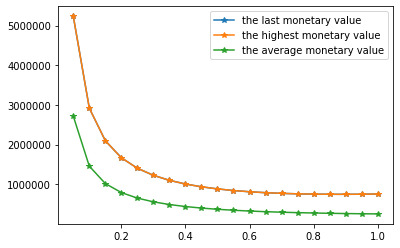

In [248]:
lines=[[],[],[]]
for i in range(len(gamma)):
    lines[0].append(V[i][-1]/gamma[i])
    lines[1].append(np.max(V[i])/gamma[i])
    lines[2].append(np.mean(V[i])/gamma[i])
#写report的话把time加上或许好看一点
plt.plot(gamma,lines[0],'*-',label="the last monetary value")
plt.plot(gamma,lines[1],'*-',label="the highest monetary value")
plt.plot(gamma,lines[2],'*-',label="the average monetary value")
plt.legend()
plt.show()

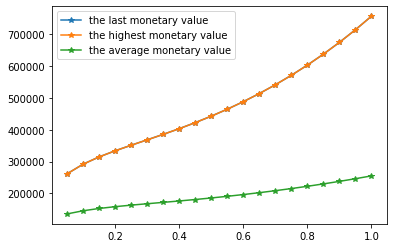

In [249]:
lines=[[],[],[]]
for i in range(len(gamma)):
    lines[0].append(V[i][-1])
    lines[1].append(np.max(V[i]))
    lines[2].append(np.mean(V[i]))
#写report的话把time加上或许好看一点
plt.plot(gamma,lines[0],'*-',label="the last monetary value")
plt.plot(gamma,lines[1],'*-',label="the highest monetary value")
plt.plot(gamma,lines[2],'*-',label="the average monetary value")
plt.legend()
plt.show()

越贪心其实离期望收益越远吼？(但就Apple的股票来看，确实越贪心收益越大……对吗？review的时候可以看看这里)

# 10 Alternative Portfolio Measure

In [259]:
gamma=[0.1, 0.3, 0.5, 0.7, 0.9]
V=[[],[],[],[],[]]
W=[[],[],[],[],[]]
for g in range(len(gamma)):
    M_5=[0]*5217
    N_5=[0]*5217
    M_5[0]=M_5[1]=M_5[2]=M_5[3]=M_5[4]=M_5[5]=100000
    r=1e-5
    gamma0=gamma[g]
    e=0.002
    for i in range(4,len_testing):
        M_5[i]=(1+r)*M_5[i]
        if count_U[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])]>count_D[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])] and cut_point_FD[0]>=testing_set_x[i]>=cut_point_FD[1]:
            #表示接受
    #         print("U")
            M_5[i+1]=M_5[i]-gamma0*M_5[i]
            N_5[i+1]=N_5[i]+(1-e)*gamma0*M_5[i]/apple_price[len_learning+i]
        elif count_U[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])]<count_D[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])] and (cut_point_FD[0]<testing_set_x[i] or testing_set_x[i]<cut_point_FD[1]):
    #         print("D")
            M_5[i+1]=M_5[i]+(1-e)*gamma0*N_5[i]*apple_price[len_learning+i]
            N_5[i+1]=N_5[i]-gamma0*N_5[i]
        else:
    #         print("H")
            M_5[i+1]=M_5[i]
            N_5[i+1]=N_5[i]
    
        V[g].append(M_5[i+1]+N_5[i+1]*apple_price[len_learning+i])
        W[g].append(M_5[i+1]/apple_price[len_learning+i]+N_5[i+1])

In [263]:
W[0][0]

941.1858823529411

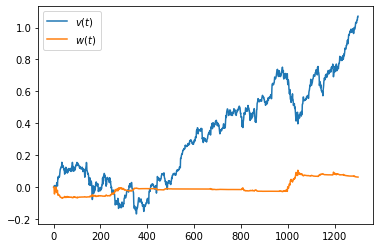

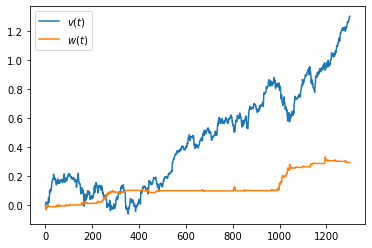

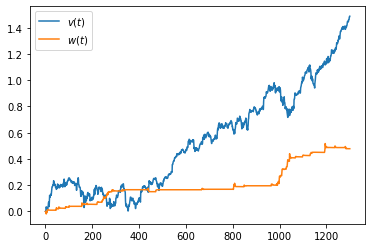

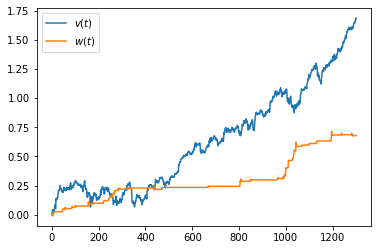

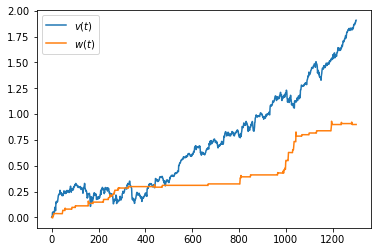

In [264]:
for i in range(len(gamma)):
    for j in range(1,len(V[i])):
        V[i][j]=np.log(V[i][j]/V[i][0])
        W[i][j]=np.log(W[i][j]/W[i][0])
    V[i][0]=0
    W[i][0]=0
#写report的话把time加上或许好看一点
    plt.plot(V[i],label="$v(t)$")
    plt.plot(W[i],label="$w(t)$")
    plt.legend()
    #这些图片要存
    plt.show()

一样 $\gamma$ 变大， $v(t)$ $w(t)$也变大

In [305]:
gamma=[0.1, 0.3, 0.5, 0.7, 0.9]
V=[[],[],[],[],[]]
W=[[],[],[],[],[]]
for g in range(len(gamma)):
    M_5=[0]*5217
    N_5=[0]*5217
    M_5[0]=M_5[1]=M_5[2]=M_5[3]=M_5[4]=M_5[5]=100000
    r=1e-5
    gamma0=gamma[g]
    e=0.002
    for i in range(4,len_testing):
        M_5[i]=(1+r)*M_5[i]
        if count_U[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])]>count_D[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])] and cut_point_FD[0]>=testing_set_x[i]>=cut_point_FD[1]:
            #表示接受
    #         print("U")
            M_5[i+1]=M_5[i]-gamma0*M_5[i]
            N_5[i+1]=N_5[i]+(1-e)*gamma0*M_5[i]/apple_price[len_learning+i]
        elif count_U[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])]<count_D[alphabets(testing_d[i-5])][alphabets(testing_d[i-4])][alphabets(testing_d[i-3])][alphabets(testing_d[i-2])][alphabets(testing_d[i-1])] and (cut_point_FD[0]<testing_set_x[i] or testing_set_x[i]<cut_point_FD[1]):
    #         print("D")
            M_5[i+1]=M_5[i]+(1-e)*gamma0*N_5[i]*apple_price[len_learning+i]
            N_5[i+1]=N_5[i]-gamma0*N_5[i]
        else:
    #         print("H")
            M_5[i+1]=M_5[i]
            N_5[i+1]=N_5[i]
    
        V[g].append(M_5[i+1]+N_5[i+1]*apple_price[len_learning+i])
        W[g].append(M_5[i+1]/apple_price[len_learning+i]+N_5[i+1])


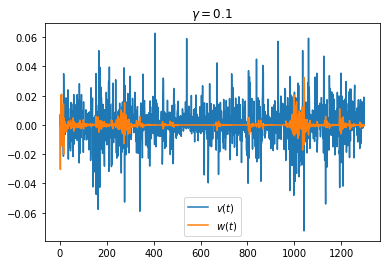

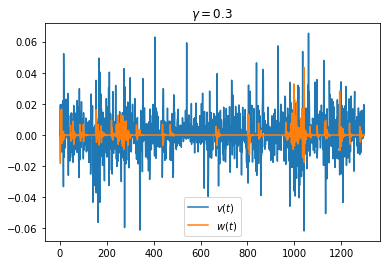

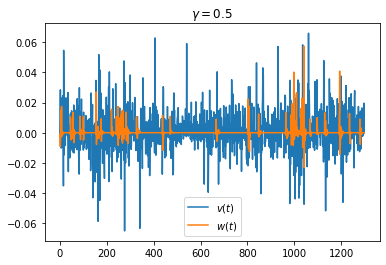

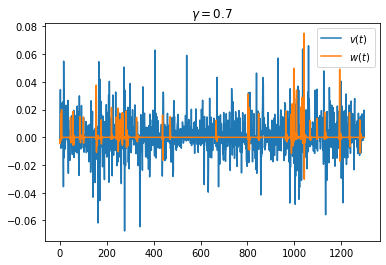

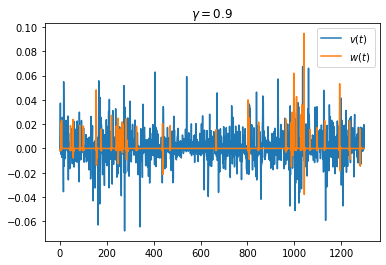

In [306]:
for i in range(len(gamma)):
    for j in range(len(V[i])-1,0,-1):
        V[i][j]=np.log(V[i][j]/V[i][j-1])
        W[i][j]=np.log(W[i][j]/W[i][j-1])
    del V[i][0]
    del W[i][0]
# print(V[0])
    #写report的话把time加上或许好看一点
    plt.plot(V[i],label="$v(t)$")
    plt.plot(W[i],label="$w(t)$")
    plt.title("$\gamma=${}".format(str(gamma[i])))
    plt.legend()
    #这些图片要存
    plt.show()